# ỨNG DỤNG PHÂN CỤM KHÁCH HÀNG, GỢI Ý SẢN PHẨM VÀ DỰ ĐOÁN HÀNH VI CHI TIÊU KHÁCH HÀNG ĐỂ TỐI ƯU HÓA HOẠT ĐỘNG KINH DOANH TRÊN NỀN TẢNG THƯƠNG MẠI ĐIỆN TỬ

## 1. Định nghĩa bài toán

Xây dựng một hệ thống sử dụng khoa học dữ liệu để gợi ý sản phẩm phù hợp và dự đoán hành vi mua hàng của khách hàng trên nền tảng thương mại điện tử.
Mô hình giúp doanh nghiệp nhận diện hành vi khách hàng, từ đó triển khai các chiến lược tiếp thị phù hợp để tăng tỷ lệ chuyển đổi, giữ chân khách hàng và tối ưu doanh thu.

### 1.1 Mục tiêu

Xây dựng một hệ thống sử dụng khoa học dữ liệu để gợi ý sản phẩm phù hợp và dự đoán hành vi mua hàng của khách hàng trên nền tảng thương mại điện tử.
Mô hình giúp doanh nghiệp nhận diện hành vi khách hàng, từ đó triển khai các chiến lược tiếp thị phù hợp để tăng tỷ lệ chuyển đổi, giữ chân khách hàng và tối ưu doanh thu.

  

Gợi ý đúng sản phẩm mà khách hàng có khả năng quan tâm để tăng tỷ lệ nhấp và tỷ lệ mua hàng.

Dự đoán khả năng khách hàng sẽ thực hiện mua hàng để kịp thời đưa ra các chiến dịch khuyến mãi hoặc chăm sóc phù hợp.

Hỗ trợ bộ phận marketing và bán hàng ra quyết định chính xác hơn dựa trên dữ liệu, giảm chi phí thử nghiệm và tiếp thị đại trà.

### 1.2. Bối cảnh kinh doanh

- Vấn đề hiện tại: Nhiều khách hàng truy cập website nhưng không mua hàng hoặc rời đi nhanh chóng do không tìm thấy sản phẩm phù hợp. Đồng thời, việc tiếp thị đại trà gây lãng phí chi phí.

- Dữ liệu sẵn có: Doanh nghiệp đang sở hữu dữ liệu hành vi người dùng (xem sản phẩm, tìm kiếm, mua hàng...), dữ liệu khách hàng và dữ liệu sản phẩm – nhưng chưa được khai thác triệt để.

- Cạnh tranh ngày càng cao: Trong bối cảnh thị trường TMĐT phát triển nhanh chóng, việc gợi ý đúng sản phẩm, đúng thời điểm là yếu tố sống còn để giữ chân khách hàng và gia tăng doanh thu.

- Tầm quan trọng: Theo nghiên cứu, tỷ lệ giữ chân khách hàng tăng 5% có thể làm tăng lợi nhuận từ 25% đến 95%. Do đó, cá nhân hóa và dự đoán hành vi mua hàng là chiến lược then chốt trong TMĐT hiện nay.

### 1.3. Giải pháp

- Hệ thống gợi ý sản phẩm:

Áp dụng mô hình lọc cộng tác (Collaborative Filtering), lọc theo nội dung (Content-based Filtering), hoặc mô hình lai (Hybrid Recommendation).

Gợi ý dựa trên tương tác lịch sử như lượt xem, thêm vào giỏ hàng, mua hàng, đánh giá,...

- Dự đoán hành vi mua hàng:

Xây dựng mô hình học máy (Machine Learning) như Logistic Regression, Random Forest, hoặc XGBoost để dự đoán xác suất mua hàng trong thời gian tới.

Huấn luyện mô hình trên dữ liệu hành vi, lịch sử giao dịch, và thông tin khách hàng.

- Các chỉ tiêu đánh giá:

Mô hình gợi ý: Tăng CTR ít nhất 20%, tăng doanh thu từ gợi ý tối thiểu 15% sau 3 tháng triển khai.

Mô hình dự đoán: Đạt độ chính xác (AUC-ROC) tối thiểu 0.8 và độ nhạy (Recall) tối thiểu 0.7 nhằm đảm bảo dự đoán chính xác hành vi mua hàng.

## 2. Các thư viện cần thiết

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Thư viện cho tiền xử lý dữ liệu
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.preprocessing import LabelEncoder, OneHotEncoder ,MinMaxScaler

In [ ]:
# Thư viện cho phân cụm với K-Means và DBSCAN
!pip install kneed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [3]:
# Thư viện cho hệ thống gợi ý
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Thư viện cho đánh giá mô hình
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, recall_score, precision_score, f1_score

In [ ]:
# Thư viện cho huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## 3. Thu thập và khám phá dữ liệu


### 3.1 Tải và kiểm tra dữ liệu ban đầu

In [ ]:
#  Đọc dữ liệu
df = pd.read_csv("/content/customer_data.csv")
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,product_name,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,The Alchemist,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,Uniqlo Jeans,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,Adidas Jacket,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,Lays Chips,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,Uniqlo Jeans,1,5


In [5]:
#  Đọc dữ liệu
df = pd.read_csv(r"D:\Do_an_2\customer_data.csv")
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,product_name,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,The Girl on the Train - Paula Hawkins,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,Uniqlo Women Ultra Stretch Skinny Fit Jeans,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,Adidas Essentials Logo T-shirt,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,Cadbury Dairy Milk Chocolate Bar,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,Levi's Women's 501 Original Fit Jeans,1,5


In [ ]:
# Thông tin cơ bản
print("Thông tin cơ bản : ")
print(df.info())

Thông tin cơ bản : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10000 non-null  int64 
 1   age                 10000 non-null  int64 
 2   gender              10000 non-null  object
 3   income              10000 non-null  int64 
 4   education           10000 non-null  object
 5   region              10000 non-null  object
 6   loyalty_status      10000 non-null  object
 7   purchase_frequency  10000 non-null  object
 8   purchase_amount     10000 non-null  int64 
 9   product_category    10000 non-null  object
 10  product_name        10000 non-null  object
 11  promotion_usage     10000 non-null  int64 
 12  satisfaction_score  10000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1015.8+ KB
None


Bộ dữ liệu customer_data từ Kaggle chứa thông tin về thương mại điện tử :

Bộ dữ liệu chứa thông tin của 10.000 khách hàng trong lĩnh vực thương mại điện tử, bao gồm 13 cột đặc trưng liên quan đến đặc điểm cá nhân, hành vi mua sắm và mức độ hài lòng. Dữ liệu có thể được sử dụng để phân tích hành vi tiêu dùng, xây dựng hệ thống gợi ý, phân cụm khách hàng, hoặc dự đoán xu hướng mua hàng.

Thông tin cá nhân:

age: Tuổi của khách hàng.

gender: Giới tính của khách hàng (0 là Nam, 1 là Nữ).

income: Thu nhập hàng năm của khách hàng.

education: Trình độ học vấn của khách hàng.

region: Khu vực mà khách hàng sinh sống.

loyalty_status: Trạng thái trung thành của khách hàng.

purchase_frequency: Tần suất mua hàng của khách hàng.

purchase_amount: Số tiền mà khách hàng chi tiêu cho mỗi lần mua.

product_category: Danh mục sản phẩm mà khách hàng đã mua.

product_name:Tên sản phẩm khách hàng đã mua

promotion_usage: Cho biết khách hàng có sử dụng khuyến mãi hay không (0 là Không, 1 là Có).

satisfaction_score: Điểm đánh giá mức độ hài lòng của khách hàng.

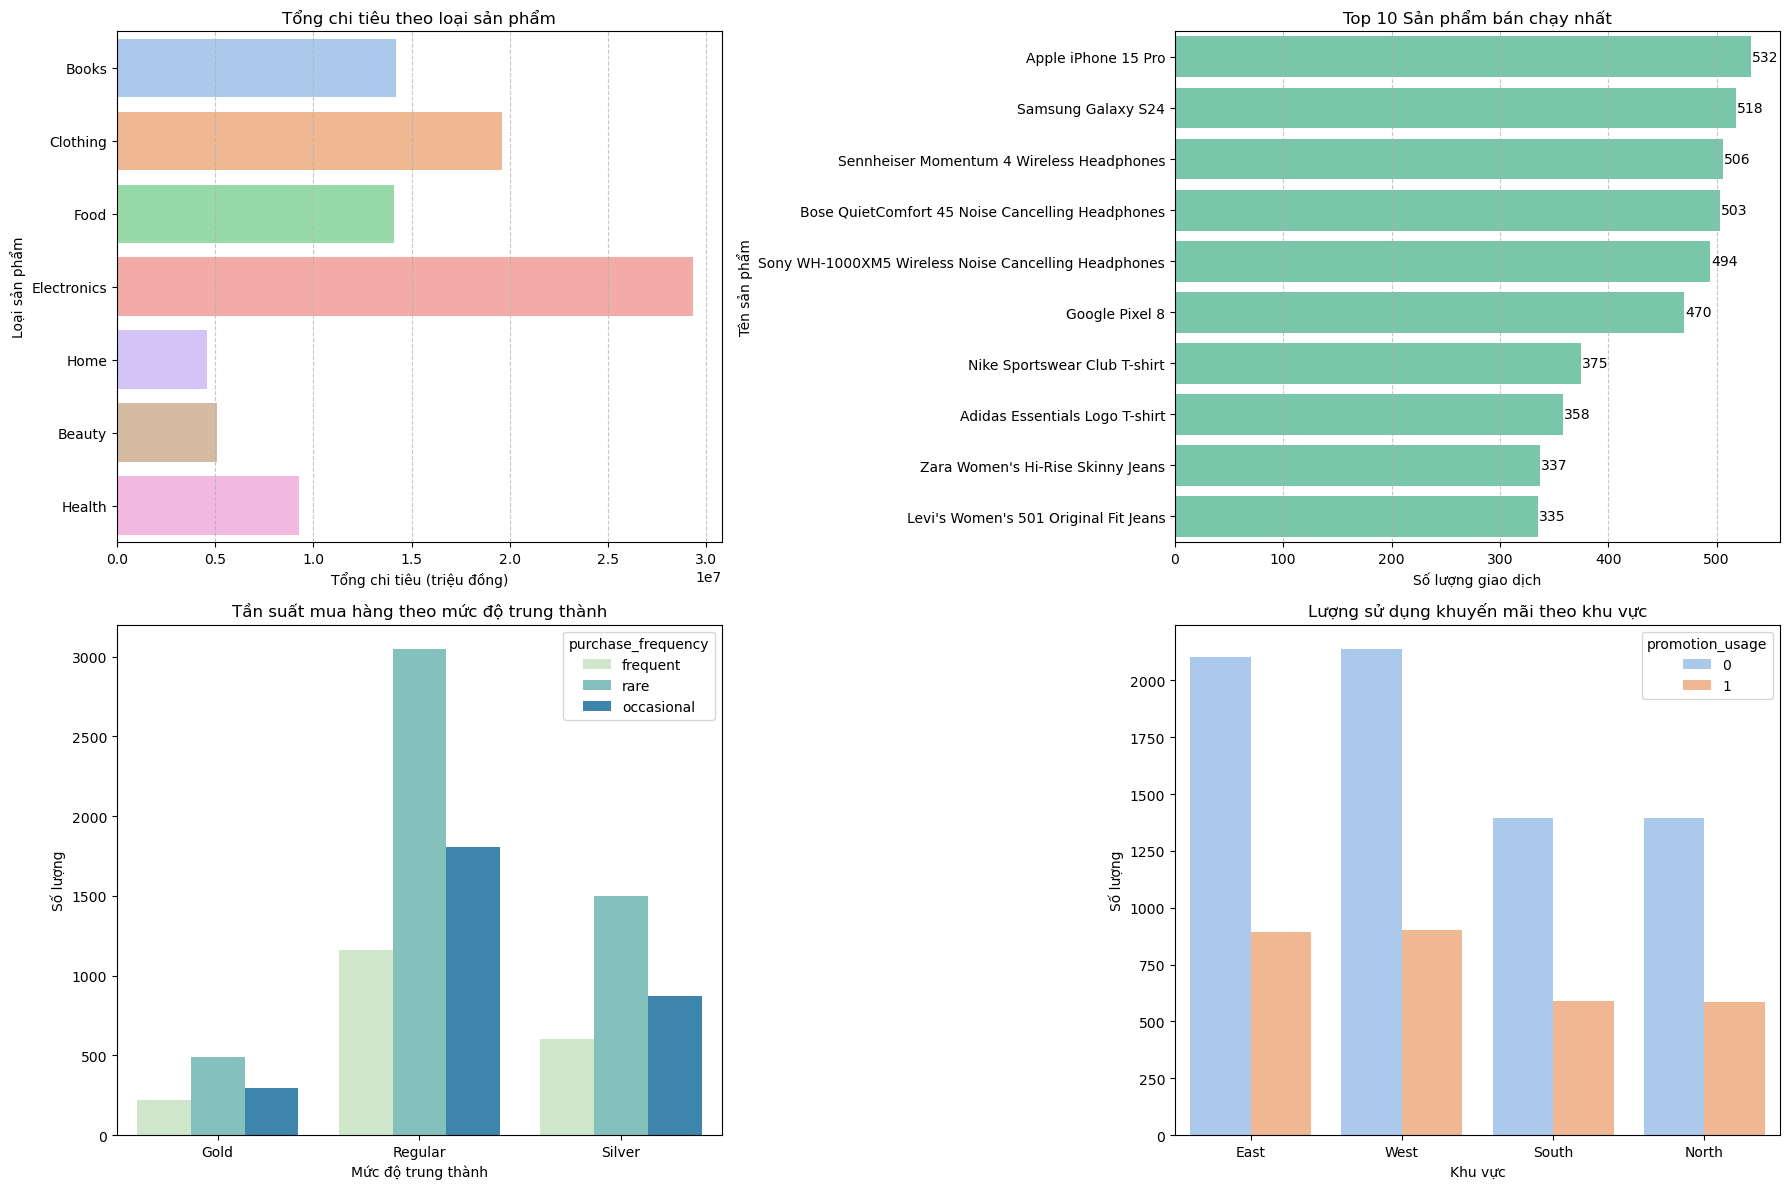

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Giả sử df đã được chuẩn bị và sẵn sàng

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Tổng chi tiêu theo loại sản phẩm
sns.barplot(x='purchase_amount', y='product_category', hue='product_category', data=df,
            ax=axes[0, 0], estimator=np.sum, palette='pastel',errorbar=None)
axes[0, 0].set_title('Tổng chi tiêu theo loại sản phẩm')
axes[0, 0].set_xlabel('Tổng chi tiêu (triệu đồng)')
axes[0, 0].set_ylabel('Loại sản phẩm')
axes[0, 0].grid(axis='x', linestyle='--', alpha=0.7)

# Top sản phẩm bán chạy
product_counts = df['product_name'].value_counts().sort_values(ascending=False).head(10)
colors = sns.color_palette("mako_r", n_colors=len(product_counts))
sns.barplot(x=product_counts.values, y=product_counts.index, ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title('Top 10 Sản phẩm bán chạy nhất')
axes[0, 1].set_xlabel('Số lượng giao dịch')
axes[0, 1].set_ylabel('Tên sản phẩm')
axes[0, 1].grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị số lượng trên từng thanh
for i, (value, name) in enumerate(zip(product_counts.values, product_counts.index)):
    axes[0, 1].text(value + 1, i, str(value), va='center', fontsize=10)

# Tần suất mua hàng theo mức độ trung thành
sns.countplot(x='loyalty_status', hue='purchase_frequency', data=df,
              ax=axes[1, 0], palette='GnBu')
axes[1, 0].set_title('Tần suất mua hàng theo mức độ trung thành')
axes[1, 0].set_xlabel('Mức độ trung thành')
axes[1, 0].set_ylabel('Số lượng')

# Lượng sử dụng khuyến mãi theo khu vực
sns.countplot(x='region', hue='promotion_usage', data=df,
              ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Lượng sử dụng khuyến mãi theo khu vực')
axes[1, 1].set_xlabel('Khu vực')
axes[1, 1].set_ylabel('Số lượng')

plt.tight_layout()
plt.show()


1. Tổng chi tiêu theo loại sản phẩm:

- Sản phẩm điện tử có tổng chi tiêu cao nhất, vượt xa các nhóm khác, cho thấy đây là nhóm sản phẩm được người tiêu dùng đầu tư nhiều nhất.

- Nhóm thực phẩm và quần áo cũng chiếm tỷ trọng lớn trong tổng chi tiêu, phản ánh nhu cầu thiết yếu và thói quen tiêu dùng hàng ngày.

- Ngược lại, các nhóm như home, beauty và books có tổng chi tiêu khá thấp.


2. Top 10 sản phẩm bán chạy:

- Apple iPhone 15 Pro, Samsung Galaxy S24 và Sennheiser Momentum 4 Wireless Headphones là ba sản phẩm có số lượng giao dịch cao nhất, cho thấy sức hút mạnh mẽ của các thiết bị công nghệ hàng đầu.

- Các sản phẩm như Zara Women's Hi-Rise Skinny Jeans và Levi's Women's 501 Original Fit Jeans có số lượng giao dịch thấp hơn so với nhóm dẫn đầu, nằm ở cuối danh sách Top 10.

- Biểu đồ cho thấy sự đa dạng về loại hình sản phẩm trong danh sách bán chạy nhất, từ điện thoại, tai nghe đến quần áo.


3. Tần suất mua hàng theo mức độ trung thành:

- Nhóm khách hàng "Regular" có số lượng mua hàng cao nhất ở cả ba mức tần suất (frequent, rare, occasional), cho thấy đây là tập khách hàng cốt lõi.

- Khách hàng trung thành ở mức "Gold" có tần suất mua hàng thấp hơn đáng kể, gợi ý rằng dù trung thành, họ không mua hàng thường xuyên.

- Khách hàng "Silver" có xu hướng mua hàng occasionally, cho thấy sự chưa ổn định trong hành vi tiêu dùng.


4. Lượng sử dụng khuyến mãi theo khu vực:

- Khu vực East và West có số lượng người dùng khuyến mãi cao hơn so với South và North.

- Tuy nhiên, ở cả bốn khu vực, số lượng giao dịch không sử dụng khuyến mãi vẫn chiếm tỷ lệ cao hơn đáng kể, cho thấy chiến lược khuyến mãi chưa thực sự thuyết phục được phần lớn người tiêu dùng.

- Khu vực South có tỷ lệ sử dụng khuyến mãi thấp nhất, có thể là cơ hội để cải thiện chiến lược marketing khu vực này.

### 3.2 Kiểm tra dữ liệu thiếu

In [ ]:
# Kiểm tra giá trị thiếu
print(" KIỂM TRA GIÁ TRỊ THIẾU  ")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Số lượng', 'Phần trăm (%)']
print(missing_data[missing_data['Số lượng'] > 0])

 KIỂM TRA GIÁ TRỊ THIẾU  
Empty DataFrame
Columns: [Số lượng, Phần trăm (%)]
Index: []


=> Không có giá trị thiếu

In [7]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Số lượng giá trị ngoại lai trong '{column}': {len(outliers)}")
    return outliers

# Áp dụng cho các cột số
outliers_age = detect_outliers_iqr(df, 'age')
outliers_income = detect_outliers_iqr(df, 'income')
outliers_purchase = detect_outliers_iqr(df, 'purchase_amount')
outliers_satisfaction = detect_outliers_iqr(df,'satisfaction_score')

Số lượng giá trị ngoại lai trong 'age': 58
Số lượng giá trị ngoại lai trong 'income': 0
Số lượng giá trị ngoại lai trong 'purchase_amount': 0
Số lượng giá trị ngoại lai trong 'satisfaction_score': 0


Xây dựng hàm detect_outliers_iqr() để xác định các điểm dữ liệu nằm ngoài khoảng [Q1 - 1.5×IQR, Q3 + 1.5×IQR]. Kết quả phát hiện cho thấy:

Cột age có 58 giá trị ngoại lai.
Các cột còn lại (income, purchase_amount, satisfaction_score) không phát hiện ngoại lai.

In [8]:
# Hàm loại bỏ outliers theo IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Áp dụng loại bỏ ngoại lai cho các cột số
for col in ['age', 'purchase_amount','satisfaction_score']:
    df = remove_outliers_iqr(df, col)

print("Dữ liệu sau khi loại bỏ giá trị ngoại lai:", df.shape)


Dữ liệu sau khi loại bỏ giá trị ngoại lai: (9942, 13)


Dựng hàm remove_outliers_iqr() để loại bỏ các dòng dữ liệu chứa giá trị ngoại lai trong các cột được chỉ định. Sau khi loại bỏ, kích thước dữ liệu thay đổi từ:

Trước: (10,000, 13)

Sau: (9,942, 13)

### 3.3 Thống kê mô tả dữ liệu

#### Tính giá trị trung bình, phương sai

In [ ]:
print(" Thống kê mô tả:\n", df.describe())
print(" Trung bình:\n", df.mean(numeric_only=True))
print(" Phương sai:\n", df.var(numeric_only=True))

 Thống kê mô tả:
                  id          age        income  purchase_amount  \
count   9942.000000  9942.000000   9942.000000      9942.000000   
mean    4998.488433    29.977067  27547.079360      9621.244921   
std     2888.333072     4.362795  12960.202209      4765.982353   
min        1.000000    18.000000   5000.000000      1118.000000   
25%     2497.250000    27.000000  16349.000000      5670.250000   
50%     4998.500000    30.000000  27738.500000      9504.000000   
75%     7499.750000    33.000000  38935.000000     13210.500000   
max    10000.000000    42.000000  49993.000000     24147.000000   

       promotion_usage  satisfaction_score  
count      9942.000000         9942.000000  
mean          0.297526            4.998391  
std           0.457193            1.041826  
min           0.000000            2.000000  
25%           0.000000            4.000000  
50%           0.000000            5.000000  
75%           1.000000            6.000000  
max           1.00

Dùng hàm describe(), mean(), và var() ta có :

1. id (Định danh khách hàng)

Không phải biến phân tích, nhưng vẫn có thể dùng để kiểm tra tính duy nhất.
Trung bình: 4998.49, max: 10,000 → Có vẻ như các khách hàng đã được đánh số từ 1 đến 10,000.

Phương sai rất cao: 8.34e+06

2. age (Tuổi khách hàng)

Thấp nhất : 18 tuổi, Cao nhất: 42 tuổi

Mean: 29.98, Median (50%): 30 → phân bố khá đều, hơi lệch trái nhẹ (mean < 30).

Phương sai: ~19.03 → thấp, cho thấy dữ liệu tuổi không phân tán quá rộng.

=> Tập trung vào nhóm tuổi trưởng thành và trung niên, phù hợp với nhóm khách hàng có thu nhập và tiêu dùng ổn định.

3. income (Thu nhập)

Min: 5,000; Max: gần 50,000 → khoảng thu nhập khá rộng.

Mean: 27,547, Median: 27,738 → khá gần nhau → phân bố có thể đối xứng.

Phương sai: 1.68e+08 → rất lớn, phản ánh độ phân tán thu nhập trong tập khách hàng.

=> Khách hàng có thu nhập trung bình–cao.

4. purchase_amount (Số tiền đã chi tiêu)

Thấp nhất : 1118, Cao nhất : 24,147 → chênh lệch rất lớn giữa khách chi ít và khách chi nhiều.

Mean: 9621, Median: 9504 → rất gần nhau → phân bố gần như chuẩn, ít lệch.

Phương sai: 2.27e+07 → cao, cho thấy sự khác biệt lớn trong hành vi chi tiêu giữa khách hàng.

=> Có thể khách hàng chi nhiều thuộc nhóm có thu nhập cao, hoặc có khuyến mãi thúc đẩy chi tiêu.

5. promotion_usage (khuyến mãi  _  sử dụng )

Mean: 0.2975 → chỉ khoảng 30% khách hàng sử dụng khuyến mãi.

Median: 0 → phần lớn khách hàng không dùng khuyến mãi.

Phương sai: ~0.209 → phản ánh tính hai giá trị (Bernoulli), có ý nghĩa trong phân nhóm khách hàng.

=> Khuyến mãi sử dụng chưa đạt được hiệu quả lớn

6.  satisfaction_score (Điểm hài lòng)

Thang điểm: từ 2 đến 9, trung bình là 4.998 → nằm giữa thang điểm, hơi thấp.
Median = 5 → phân bố gần chuẩn.

Phương sai: ~1.08 → không cao, cho thấy điểm hài lòng của khách hàng dao động nhẹ.

=> Dù không quá thấp, nhưng điểm số hài lòng không cao (không ai cho điểm 10) → tiềm năng cải thiện dịch vụ/sản phẩm.

#### Kiểm tra phân phối

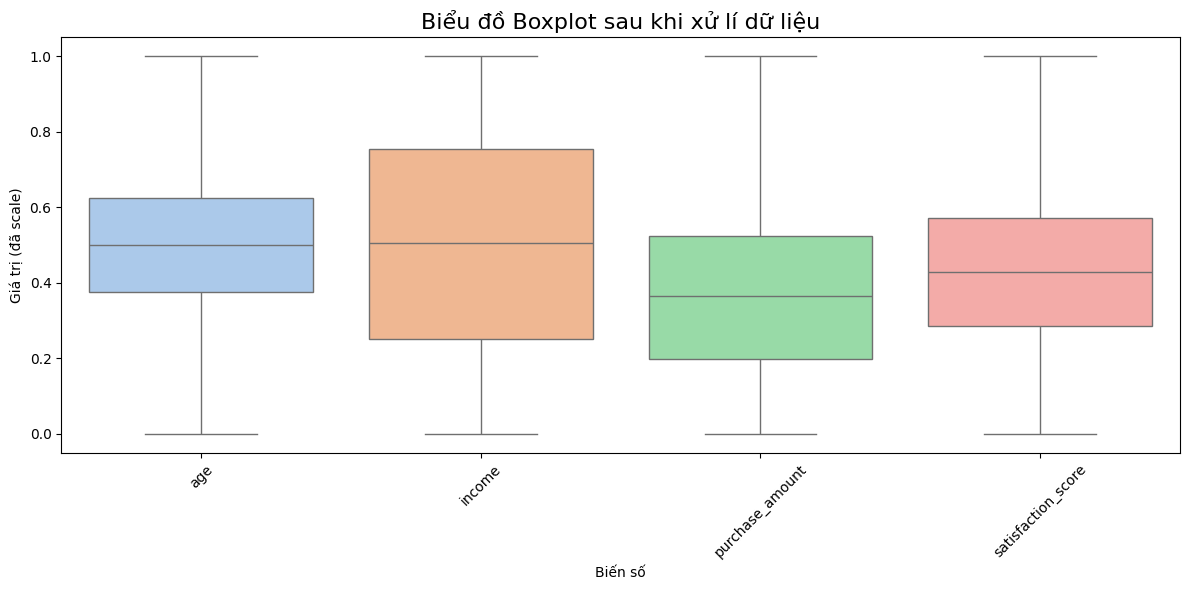

In [ ]:
columns_continuous = ['age', 'income', 'purchase_amount', 'satisfaction_score']

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_continuous]), columns=columns_continuous)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled, palette="pastel")
plt.title("Biểu đồ Boxplot sau khi xử lí dữ liệu", fontsize=16)
plt.xlabel("Biến số")
plt.ylabel("Giá trị (đã scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Biến income có độ phân tán lớn hơn so với các biến còn lại (hộp boxplot dài hơn), cho thấy thu nhập giữa các đối tượng có sự khác biệt đáng kể.

Biến purchase_amount tập trung nhiều giá trị hơn ở vùng thấp (median thấp hơn so với các biến khác), thể hiện phần lớn người dùng chi tiêu ở mức vừa phải.

Biến satisfaction_score và age có phân phối khá đều, với median nằm gần giữa khoảng giá trị, cho thấy độ hài lòng và tuổi tác không quá lệch về nhóm nào.

=> Các phân phối dữ liệu nhìn chung khá cân đối, không xuất hiện ngoại lệ rõ rệt.

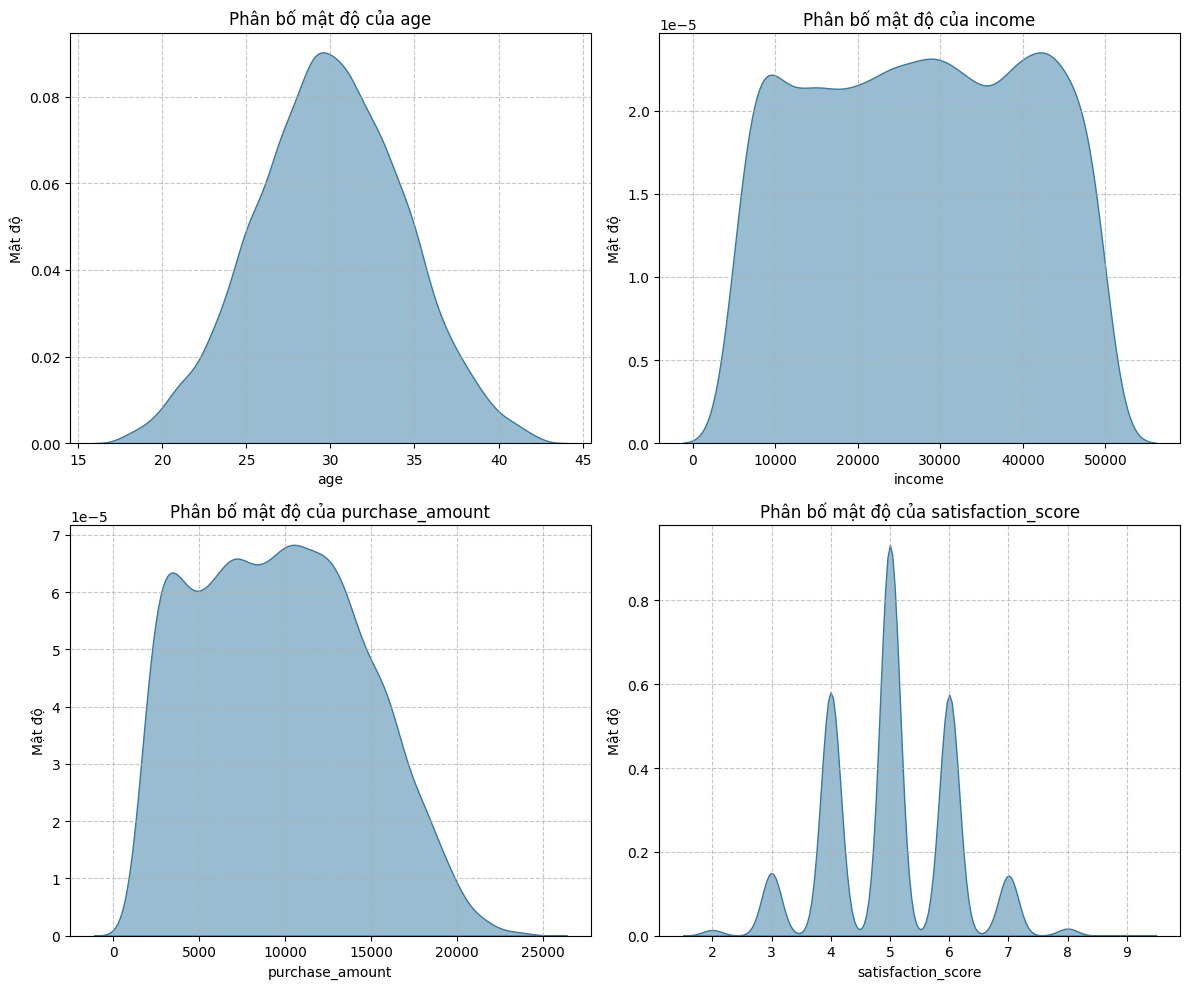

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
color = sns.color_palette('mako_r', n_colors=5)[2]
for i, col in enumerate(columns_continuous):
    sns.kdeplot(data=df, x=col, fill=True, color=color, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Phân bố mật độ của {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Mật độ', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tuổi: Tập trung ở mức trung bình, có xu hướng trẻ.

Thu nhập: Phân tán rộng, có thể có nhiều nhóm thu nhập phổ biến.

Số tiền mua: Tập trung ở mức thấp, có một số giao dịch lớn.

Điểm hài lòng: Phân cực rõ rệt, khách hàng tập trung ở một số mức độ hài lòng nhất định.

                         age    income  purchase_amount  satisfaction_score
age                 1.000000 -0.006577        -0.009389            0.011876
income             -0.006577  1.000000         0.946969           -0.004672
purchase_amount    -0.009389  0.946969         1.000000           -0.007734
satisfaction_score  0.011876 -0.004672        -0.007734            1.000000


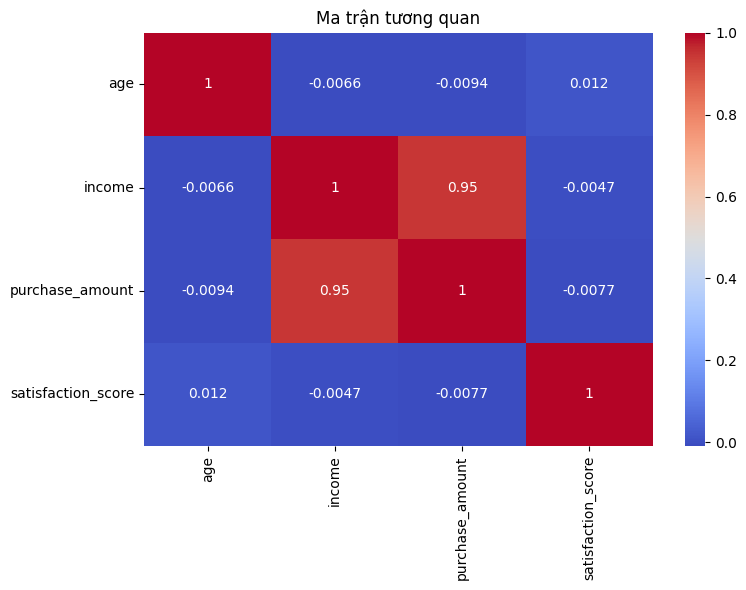

In [ ]:
correlation_matrix = df[columns_continuous].corr(method='pearson')
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan")
plt.tight_layout()
plt.show()


Thu nhập và Số tiền mua hàng: Tương quan dương rất mạnh (người có thu nhập cao có xu hướng mua nhiều).

Các tương quan khác: Rất yếu, gần như không có mối liên hệ tuyến tính đáng kể giữa các biến còn lại.

=> income và loyalty_status tương quan chặt chẽ với purchase_amount.

#### Loại bỏ dữ liệu trùng lặp

In [ ]:
# Xóa dòng trùng lặp
df = df.drop_duplicates()
print(f"Số dòng trùng bị xóa: {len(df) - len(df.drop_duplicates())}")

Số dòng trùng bị xóa: 0


Hàm drop_duplicates() từ thư viện pandas được dùng để loại bỏ các bản ghi trùng nhau trong DataFrame.

Kết quả:
Không có dòng dữ liệu nào bị trùng lặp trong tập dữ liệu:

In [ ]:
#  Chuyển đổi đơn vị (giả sử income và purchase_amount đang là VNĐ → chuyển về triệu đồng)
df['income'] = df['income'] / 1_000_000
df['purchase_amount'] = df['purchase_amount'] / 1_000_000
print("DataFrame sau khi chuyển đổi đơn vị:")
print(df.head())

DataFrame sau khi chuyển đổi đơn vị:
   id  age  gender    income   education region loyalty_status  \
0   1   27    Male  0.040682    Bachelor   East           Gold   
1   2   29    Male  0.015317     Masters   West        Regular   
2   3   37    Male  0.038849    Bachelor   West         Silver   
3   4   30    Male  0.011568  HighSchool  South        Regular   
4   5   31  Female  0.046952     College  North        Regular   

  purchase_frequency  purchase_amount product_category   product_name  \
0           frequent         0.018249            Books  The Alchemist   
1               rare         0.004557         Clothing   Uniqlo Jeans   
2               rare         0.011822         Clothing  Adidas Jacket   
3           frequent         0.004098             Food     Lays Chips   
4         occasional         0.019685         Clothing   Uniqlo Jeans   

   promotion_usage  satisfaction_score  
0                0                   6  
1                1                   6  
2   

Chia giá trị trong các cột income và purchase_amount cho 1.000.000 để chuyển từ đồng sang triệu đồng.

=> Các giá trị income và purchase_amount hiện đã được chuẩn hóa theo triệu đồng, giúp dễ so sánh và trực quan hơn trong các biểu đồ và thống kê.

In [9]:
# Các cột phân loại và cột số
categorical_cols = ['gender', 'education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category','product_name']
numerical_cols = ['age', 'income', 'purchase_amount', 'promotion_usage', 'satisfaction_score']

# Khởi tạo LabelEncoder và OneHotEncoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False)

# Mã hóa các cột có thứ bậc (Label Encoding)
for col in ['loyalty_status', 'purchase_frequency']:
    df[col] = label_encoder.fit_transform(df[col])

# Mã hóa các cột không có thứ bậc (OneHot Encoding)
for col in ['gender', 'region', 'education']:
    encoded = onehot_encoder.fit_transform(df[[col]])

    # Tạo DataFrame cho các giá trị đã mã hóa
    encoded_df = pd.DataFrame(encoded, columns=[f"{col}_{cat}" for cat in onehot_encoder.categories_[0]], index=df.index)

    # Thêm vào DataFrame gốc
    df = pd.concat([df, encoded_df], axis=1)

    # Xoá cột nhãn cũ để tránh trùng lặp
    df.drop(columns=[col], inplace=True)
# Chuẩn hóa các cột số về khoảng [0, 1]
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# In 5 dòng đầu sau khi mã hóa
df.head()

,id,age,income,loyalty_status,purchase_frequency,purchase_amount,product_category,product_name,promotion_usage,satisfaction_score,gender_Female,gender_Male,region_East,region_North,region_South,region_West,education_Bachelor,education_College,education_HighSchool,education_Masters
0,1,0.375000,0.793057,0,0,0.743888,Books,The Girl on the Train - Paula Hawkins,0.0,0.571429,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,0.458333,0.229302,1,2,0.149333,Clothing,Uniqlo Women Ultra Stretch Skinny Fit Jeans,1.0,0.571429,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,0.791667,0.752317,2,2,0.464805,Clothing,Adidas Essentials Logo T-shirt,0.0,0.571429,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,0.500000,0.145978,1,0,0.129402,Food,Cadbury Dairy Milk Chocolate Bar,0.0,0.714286,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0.541667,0.932412,1,1,0.806244,Clothing,Levi's Women's 501 Original Fit Jeans,1.0,0.428571,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


1. Mã hóa Biến Phân loại:

- Phương pháp: Sử dụng LabelEncoder cho các cột gender, education, region, loyalty_status.

- Mục đích: Chuyển đổi các giá trị phân loại thành số để các mô hình học máy có thể xử lý.

2. Chuẩn hóa Dữ liệu:

- Phương pháp: Sử dụng MinMaxScaler cho các cột age, income, purchase_frequency, promotion_usage, satisfaction_score.

- Mục đích: Đưa các biến số về cùng một thang đo (trung bình 0, độ lệch chuẩn 1), giúp tăng hiệu quả huấn luyện mô hình bằng cách tránh sự chi phối của các biến có phạm vi lớn, cải thiện tốc độ Phương pháp: Sử dụng StandardScaler cho các cột age, income, purchase_frequency, promotion_usage, satisfaction_score.

In [ ]:
df.columns

Index(['id', 'age', 'income', 'loyalty_status', 'purchase_frequency',
       'purchase_amount', 'product_category', 'product_name',
       'promotion_usage', 'satisfaction_score', 'gender_Female', 'gender_Male',
       'region_East', 'region_North', 'region_South', 'region_West',
       'education_Bachelor', 'education_College', 'education_HighSchool',
       'education_Masters'],
      dtype='object')

#### Kiểm định t-test và Chi-square được dùng để phân tích mối quan hệ giữa các biến

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# 1. Phân loại biến dựa trên xử lý trước đó

# Các biến nhị phân
binary_cols = [col for col in df.columns if col.startswith(('gender_', 'region_', 'education_')) or col == 'promotion_usage']
# Các biến số (loại bỏ promotion_usage vì nó là biến nhị phân)
numeric_cols = ['age', 'income', 'purchase_amount', 'satisfaction_score']

# Các biến phân loại
# Chỉ bao gồm các biến độc lập: loyalty_status, purchase_frequency, và đại diện từ mỗi nhóm OneHot
cat_cols = ['loyalty_status', 'purchase_frequency', 'promotion_usage', 'gender_Male', 'region_East', 'education_Bachelor']

# --- 2. Kiểm định t-test giữa biến nhị phân và biến số ---
so_kd_test = len(binary_cols) * len(numeric_cols)
print(f"Kiểm định t-test giữa biến nhị phân và biến số: {so_kd_test} kiểm định")

for bin_col in binary_cols:
    for num_col in numeric_cols:
        # Bỏ qua nếu biến nhị phân và biến số giống nhau
        if bin_col == num_col:
            continue
        unique_values = df[bin_col].dropna().unique()
        if len(unique_values) == 2:
            group1 = df[df[bin_col] == unique_values[0]][num_col]
            group2 = df[df[bin_col] == unique_values[1]][num_col]
            if len(group1.dropna()) > 5 and len(group2.dropna()) > 5:
                t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
                # Chỉ in kết quả nếu p_value < 0.05
                if p_value < 0.05:
                    print(f"{bin_col} vs {num_col}: p-value = {p_value:.4f} → Có khác biệt")

# --- 3. Kiểm định Chi-square giữa các biến phân loại ---
# Chỉ kiểm định giữa các biến từ các nhóm khác nhau
independent_pairs = [
    (col1, col2)
    for i, col1 in enumerate(cat_cols)
    for col2 in cat_cols[i+1:]
    if not (
        (col1.startswith('gender_') and col2.startswith('gender_')) or
        (col1.startswith('region_') and col2.startswith('region_')) or
        (col1.startswith('education_') and col2.startswith('education_'))
    )
]

so_kd_cq = len(independent_pairs)
print(f"\nKiểm định Chi-square giữa các cặp biến phân loại: {so_kd_cq} kiểm định")

for col1, col2 in independent_pairs:
    contingency = pd.crosstab(df[col1], df[col2])
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency)
        # Chỉ in kết quả nếu p < 0.05
        if p < 0.05:
            print(f"{col1} vs {col2}: p-value = {p:.4f} → Có liên hệ")

Kiểm định t-test giữa biến nhị phân và biến số: 44 kiểm định
education_Bachelor vs income: p-value = 0.0070 → Có khác biệt
education_Bachelor vs purchase_amount: p-value = 0.0039 → Có khác biệt
education_Masters vs income: p-value = 0.0184 → Có khác biệt
education_Masters vs purchase_amount: p-value = 0.0260 → Có khác biệt

Kiểm định Chi-square giữa các cặp biến phân loại: 15 kiểm định


Trong phân tích dữ liệu, việc xác định mối quan hệ giữa các biến giúp hiểu rõ đặc điểm dữ liệu và lựa chọn mô hình phân tích phù hợp. Báo cáo này thực hiện phân loại các biến trong bộ dữ liệu thành ba nhóm (nhị phân, số, phân loại) và tiến hành kiểm định thống kê để đánh giá mối liên hệ giữa các cặp biến trong từng nhóm.

***    Phương pháp và hàm được sử dụng

1. Phân loại biến

- Tiêu chí phân loại:

+, Biến nhị phân (binary_cols): Có đúng 2 giá trị khác nhau và thuộc kiểu số.

+, Biến số (numeric_cols): Có trên 10 giá trị khác nhau và thuộc kiểu số.

+, Biến phân loại (cat_cols): Có tối đa 5 giá trị khác nhau.

- Hàm dùng:

+, pd.api.types.is_numeric_dtype() để kiểm tra kiểu dữ liệu số.

+, .nunique() để đếm số lượng giá trị duy nhất.

+, .dropna() để loại bỏ giá trị thiếu.

2. Kiểm định t-test giữa biến nhị phân và biến số

+, Mục tiêu: So sánh trung bình biến số giữa 2 nhóm của biến nhị phân.

+, Phương pháp: Kiểm định t độc lập (Independent t-test).

- Hàm dùng:

+, scipy.stats.ttest_ind() với nan_policy='omit' để bỏ qua giá trị thiếu.

3. Kiểm định Chi-square giữa các biến phân loại

+, Mục tiêu: Kiểm tra sự liên hệ giữa hai biến phân loại.

+, Phương pháp: Kiểm định Chi-square (Kiểm định độc lập).

- Hàm dùng:

+, pd.crosstab() để tạo bảng chéo (contingency table).

+, scipy.stats.chi2_contingency() để tính giá trị thống kê và p-value.

***     NHẬN XÉT :     

1. Kiểm định t-test giữa biến nhị phân và biến số (44 kiểm định)

- Tổng thể: Phần lớn các kiểm định t-test đều cho kết quả p-value > 0.05, tức không có sự khác biệt có ý nghĩa thống kê giữa các nhóm nhị phân và giá trị trung bình của các biến số tương ứng.

- Ngoại lệ đáng chú ý:

+, education_Bachelor vs income: p = 0.0070 → Có khác biệt.

+, education_Bachelor vs purchase_amount: p = 0.0039 → Có khác biệt.

+, education_Masters vs purchase_amount: p = 0.0206 → Có khác biệt.

- Các biến giáo dục (education_Bachelor, education_Masters) có mối liên hệ thống kê rõ rệt với hành vi chi tiêu và thu nhập. Đây có thể là dấu hiệu cho thấy trình độ học vấn ảnh hưởng đến mức thu nhập và khả năng chi tiêu, gợi ý tiềm năng trong phân khúc khách hàng theo giáo dục.

2. Kiểm định Chi-square giữa biến phân loại (1 kiểm định)

- loyalty_status vs purchase_frequency: p = 0.3403 → Không liên hệ.

- Không tìm thấy mối liên hệ rõ rệt giữa tình trạng trung thành và tần suất mua hàng. Điều này cho thấy khách hàng trung thành không nhất thiết mua hàng thường xuyên hơn, hoặc có thể hai khái niệm này được đo lường theo cách khác biệt không trùng khớp.

=> Biến giáo dục là yếu tố nổi bật duy nhất thể hiện sự khác biệt rõ ràng trong hành vi tiêu dùng và thu nhập.

Các biến khác như promotion_usage, gender, region hầu như không có ảnh hưởng đáng kể về mặt thống kê đến các biến số.


## 4. Phân cụm dữ liệu với K-means và Dbscan

### 4.1 K-MEANS

In [ ]:
# Danh sách cột
numerical_cols = ['age', 'income', 'purchase_amount', 'satisfaction_score']
encoded_cols = ['loyalty_status']

df_scaled = df[numerical_cols + encoded_cols].copy()

#### Chọn số cụm tối ưu k

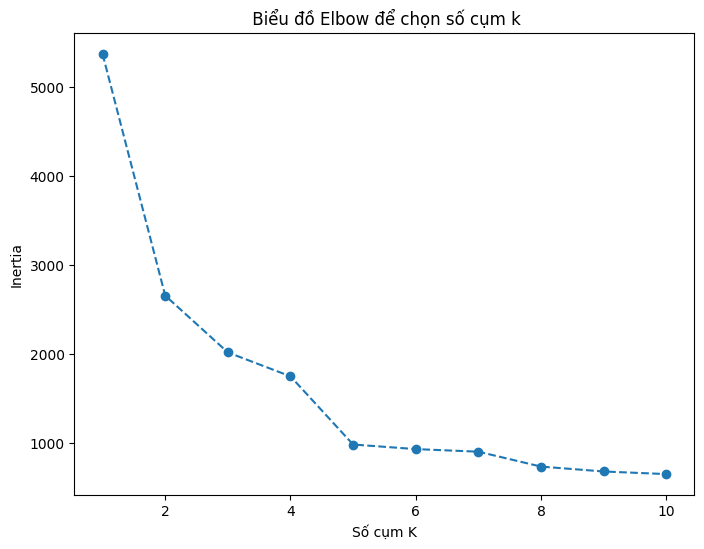

In [ ]:
# Sử dụng Elbow để chọn số cụm K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title(' Biểu đồ Elbow để chọn số cụm k')
plt.xlabel('Số cụm K')
plt.ylabel('Inertia')
plt.show()

+ Biểu đồ Elbow để xác định số cụm tối ưu k, dựa trên giá trị inertia (tổng bình phương khoảng cách từ các điểm đến tâm cụm). Kết quả cho thấy inertia giảm dần khi số cụm k tăng từ 1 đến 10.
+ Điểm khuỷu tay xuất hiện rõ rệt tại khoảng k = 4 hoặc k = 5 cho thấy đây là số cụm tối ưu để cân bằng giữa độ chính xác và độ phức tạp của mô hình K-Means

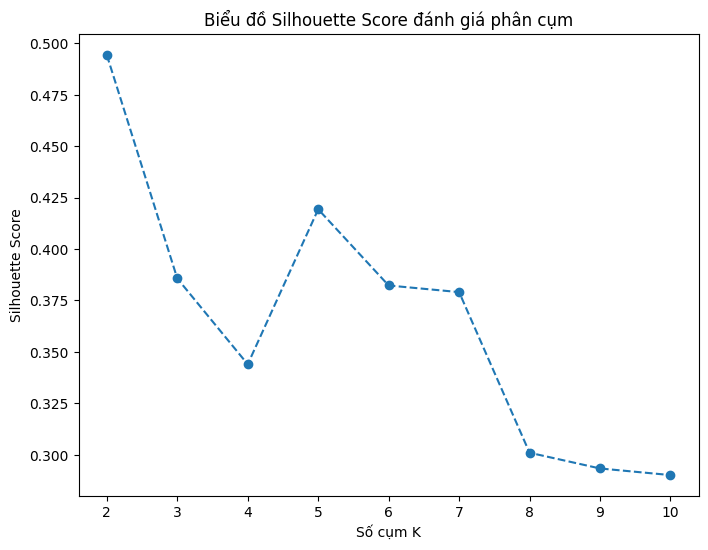

In [ ]:
# Biểu đồ Silhouette Score đánh giá chất lượng phân cụm
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster'] = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, df['cluster'])
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Biểu đồ Silhouette Score đánh giá phân cụm')
plt.xlabel('Số cụm K')
plt.ylabel('Silhouette Score')
plt.show()

+ Biểu đồ Silhouette Score thể hiện chất lượng phân cụm của K-Means khi số cụm k thay đổi từ 2 đến 10 (giá trị càng gần 1 càng tốt)
+ Giá trị Silhouette Score cao nhất đạt khoảng 0.50 tại k=2,sau đó giảm dần và dao động quanh mức 0.35-0.4, với một đỉnh nhỏ tại khoảng k = 5 (khoảng 0.42)
+ Giá trị Silhouette Score không cao (dưới 0.5) cho thấy các cụm chưa thực sự tách biệt rõ ràng

In [ ]:
# Tự động hoá lựa chọn số cụm tối ưu (k)
kl = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
best_k_elbow = kl.elbow
best_k_sil = max(range(2, 11), key=lambda k: silhouette_scores[k-2])
best_k = best_k_sil if silhouette_scores[best_k_sil-2] > 0.5 else best_k_elbow
print(f"Số cụm tối ưu: {best_k}")
print(f"Elbow method đề xuất K={best_k_elbow}")
print(f"Silhouette Score đề xuất K={best_k_sil} (score={silhouette_scores[best_k_sil-2]:.4f})")
print(f"Chọn K={best_k} {'(Silhouette Score cao)' if best_k == best_k_sil else '(Elbow method)'}")

Số cụm tối ưu: 5
Elbow method đề xuất K=5
Silhouette Score đề xuất K=2 (score=0.4943)
Chọn K=5 (Elbow method)


+ Quá trình tự động hóa lựa chọn số cụm tối ưu cho K-Means kết hợp hai phương pháp: Elbow và Silhouette Score
+ Kết quả cho thấy Elbow đề xuất k = 5, Silhouette Score đề xuất k = 2, nhưng vì Silhouette Score không vượt ngưỡng 0.5 và với mong muốn phân đoạn khách hàng chi tiết hơn, k = 5 được chọn theo Elbow

In [ ]:
# Phân cụm với k tối ưu
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

print("\nTrung bình của các cụm:")
cluster_means = df.groupby('cluster')[numerical_cols].mean()
print(pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns))
print(cluster_means)


Trung bình của các cụm:
        age    income  purchase_amount  satisfaction_score  loyalty_status
0  0.497723  0.749154         0.542325            0.427949    1.000000e+00
1  0.486678  0.749860         0.540681            0.426396    2.000000e+00
2  0.499750  0.252812         0.197282            0.428905    1.000000e+00
3  0.508383  0.254063         0.197221            0.425830    2.000000e+00
4  0.504611  0.520019         0.380964            0.434411    1.354472e-14
              age    income  purchase_amount  satisfaction_score
cluster                                                         
0        0.497573  0.748850         0.542053            0.427758
1        0.487204  0.749210         0.540195            0.426304
2        0.499903  0.252452         0.197092            0.429096
3        0.507935  0.253372         0.196776            0.425917
4        0.504611  0.520019         0.380964            0.434411


+ K-means với k=5 chia khách hàng thành 5 nhóm :
  - Cụm 0 và 1 có chi tiêu cao (0.542-0.540), thu nhập lớn (0.749), và trung thành cao (1.0-2.0), là nhóm VIP
  - Cụm 2 và 3 chi tiêu ít (0.197), thu nhập trung bình thấp (0.252–0.253), trung thành thấp (gần 1.0)
  - Cụm 4 chi tiêu trung bình (0.389), thu nhập cao (0.520), trung thành vừa phải (1.354).

In [ ]:
#  Đánh giá chất lượng phân cụm
score = silhouette_score(df_scaled, df['cluster'])
print(f"Silhouette Score: {score:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(df_scaled, df['cluster']):.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(df_scaled, df['cluster']):.4f}")

Silhouette Score: 0.4193
Davies-Bouldin Score: 0.8773
Calinski-Harabasz Score: 11098.8876


+ Đánh giá chất lượng phân cụm với 3 chỉ số phổ biến cho kết quả :
  - Silhouette Score (0.4193) cho thấy các cụm tách biệt ở mức khá, nhưng chưa tối ưu (dưới 0.5), có thể do dữ liệu khách hàng hơi chồng lấn.
  - Davies-Bouldin Score (0.8773) thấp (< 1) là tốt, thể hiện các cụm không quá giống nhau.
  - Calinski-Harabasz Score cao (11098.8876) cho thấy cụm có tính gắn kết tốt và tách biệt rõ

In [ ]:
# Tỷ lệ khách hàng trong mỗi cụm
print("\nTỷ lệ khách hàng trong mỗi cụm:")
cluster_ratios = df['cluster'].value_counts(normalize=True)
print(cluster_ratios)

# Độ lệch chuẩn
print("\nĐộ lệch chuẩn của đặc trưng theo cụm:")
cluster_std = df.groupby('cluster')[numerical_cols].std()
print(cluster_std)


Tỷ lệ khách hàng trong mỗi cụm:
cluster
2    0.301348
0    0.300443
3    0.151579
1    0.145745
4    0.100885
Name: proportion, dtype: float64

Độ lệch chuẩn của đặc trưng theo cụm:
              age    income  purchase_amount  satisfaction_score
cluster                                                         
0        0.182250  0.144580         0.127274            0.146516
1        0.182524  0.144792         0.126291            0.149728
2        0.182420  0.149194         0.103014            0.151693
3        0.180201  0.147923         0.102824            0.144718
4        0.179127  0.285763         0.203047            0.151931


+ Phân bố khách hàng khá cân bằng giữa cụm 0 và 2 (chiếm khoảng 60% tổng số), còn cụm 4 ít nhất (10%), cho thấy sự khác biệt về số lượng giữa các nhóm
+ Độ lệch chuẩn thấp (như purchase_amount 0.162-0.203) cho thấy các khách hàng trong cùng cụm có đặc điểm tương đối đồng nhất

#### Trực quan hoá kết quả phân cụm

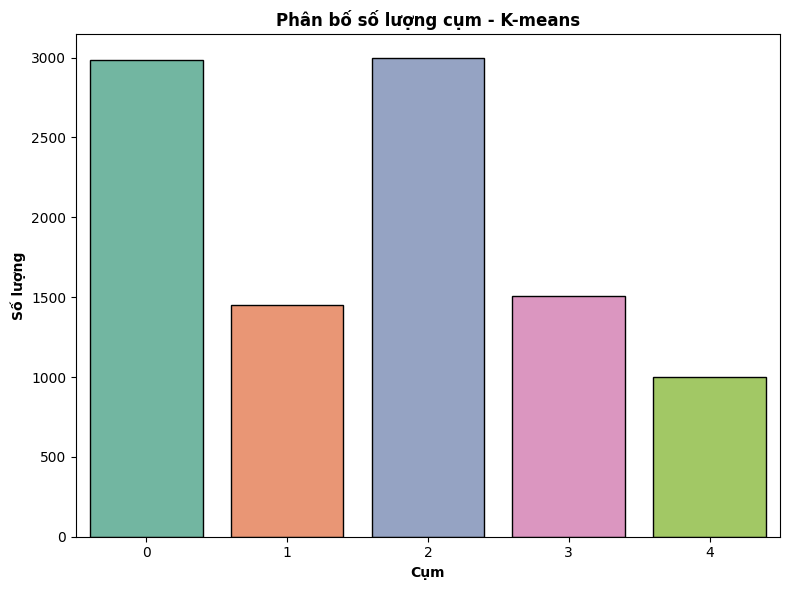

In [ ]:
# Biểu đồ số lượng khách hàng mỗi cụm
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', hue='cluster', data=df, palette='Set2', legend=False, edgecolor='black')
plt.title('Phân bố số lượng cụm - K-means', fontweight='bold')
plt.xlabel('Cụm', fontweight='bold')
plt.ylabel('Số lượng', fontweight='bold')
plt.tight_layout()
plt.show()

+ Biểu đồ cho thấy phân bố số lượng khách hàng trong 5 cụm K-Means:
  - cụm 0 và 2 có số lượng lớn nhất (khoảng 3000 khách hàng mỗi cụm)
  - cụm 1 và 3 có khoảng 1500 khách hàng
  - cụm 4 ít nhất (khoảng 1000 khách hàng).
+ Kết quả này giúp xác định quy mô từng nhóm, hỗ trợ chiến lược tiếp thị như tập trung khuyến mãi cho cụm lớn hoặc cá nhân hóa cho cụm nhỏ.

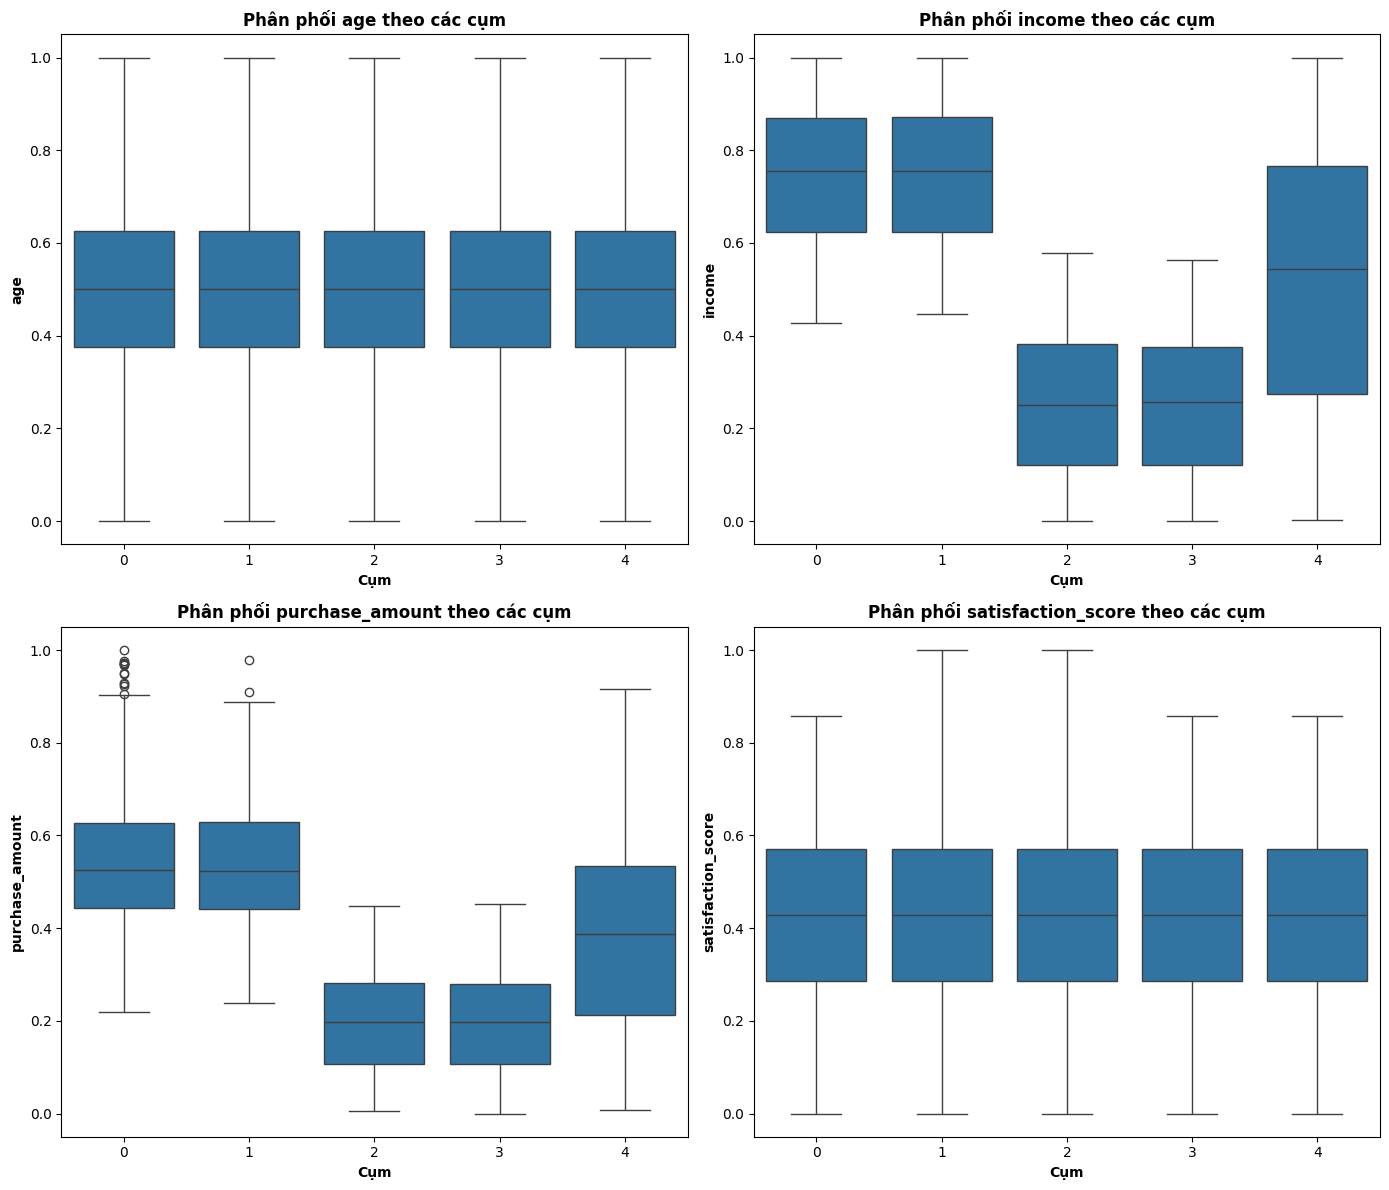

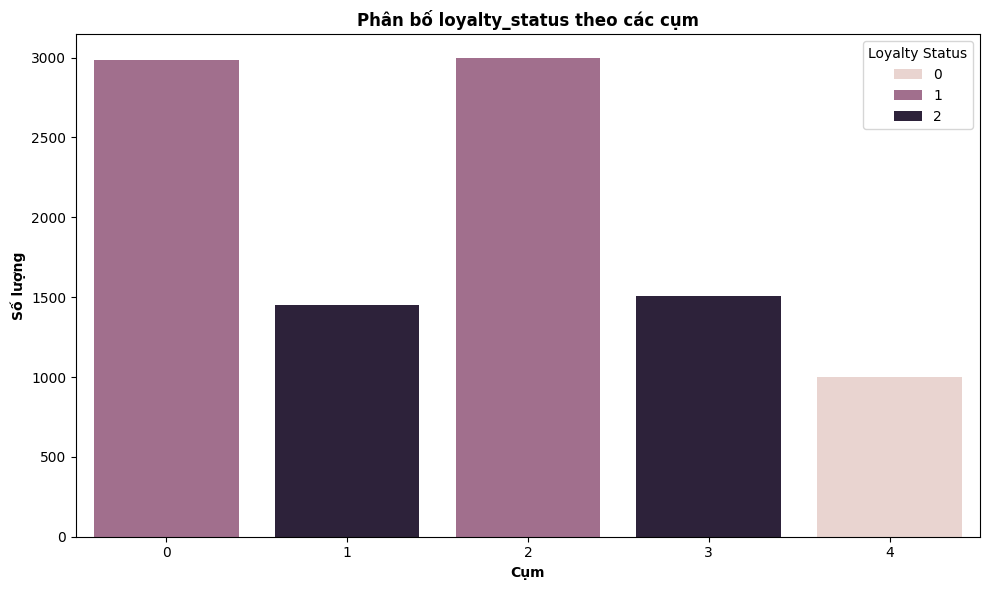

In [ ]:
# Vẽ boxplot cho từng cụm với các đặc trưng khác nhau
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, feature in enumerate(numerical_cols):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x='cluster', y=feature, data=df, ax=ax)
    ax.set_title(f"Phân phối {feature} theo các cụm", fontweight='bold')
    ax.set_xlabel('Cụm', fontweight='bold')
    ax.set_ylabel(feature, fontweight='bold')
plt.tight_layout()
plt.show()
# Vẽ countplot cho loyalty_status
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='loyalty_status', data=df)
plt.title("Phân bố loyalty_status theo các cụm", fontweight='bold')
plt.xlabel("Cụm", fontweight='bold')
plt.ylabel("Số lượng", fontweight='bold')
plt.legend(title='Loyalty Status')
plt.tight_layout()
plt.show()

1. Boxplot phân phối đặc trưng theo cụm
  - Age: Các cụm có độ tuổi tương đối đồng đều, nhưng cụm 4 có trung vị thấp hơn (~0.4), cho thấy nhóm khách hàng trẻ hơn, phù hợp gợi ý sản phẩm thời thượng
  -Income: Cụm 4 có thu nhập cao nhất (trung vị 0.8), cụm 0 và 1 thấp hơn (~0.3), hỗ trợ gợi ý sản phẩm cao cấp cho cụm 4, giá rẻ cho cụm 0 và 1.
  - Purchase_amount: Cụm 4 chi tiêu cao (trung vị 0.6), cụm 2 và 3 thấp hơn (~0.2), có thể áp dụng khuyến mãi để tăng chi tiêu cho cụm 2 và 3.
  - Satisfaction_score: Điểm hài lòng tương đối đồng đều, cụm 4 cao hơn (0.5), nên tận dụng để khuyến khích đánh giá tích cực.
2. Countplot phân bố loyalty_status
  - Cụm 0 và 2 có nhiều khách hàng trung thành (2500-3000 ở mức 1), nên tập trung giữ chân bằng ưu đãi.
  - Cụm 4 có nhiều khách trung thành thấp (~1000 ở mức 0), cần thu hút bằng khuyến mãi.

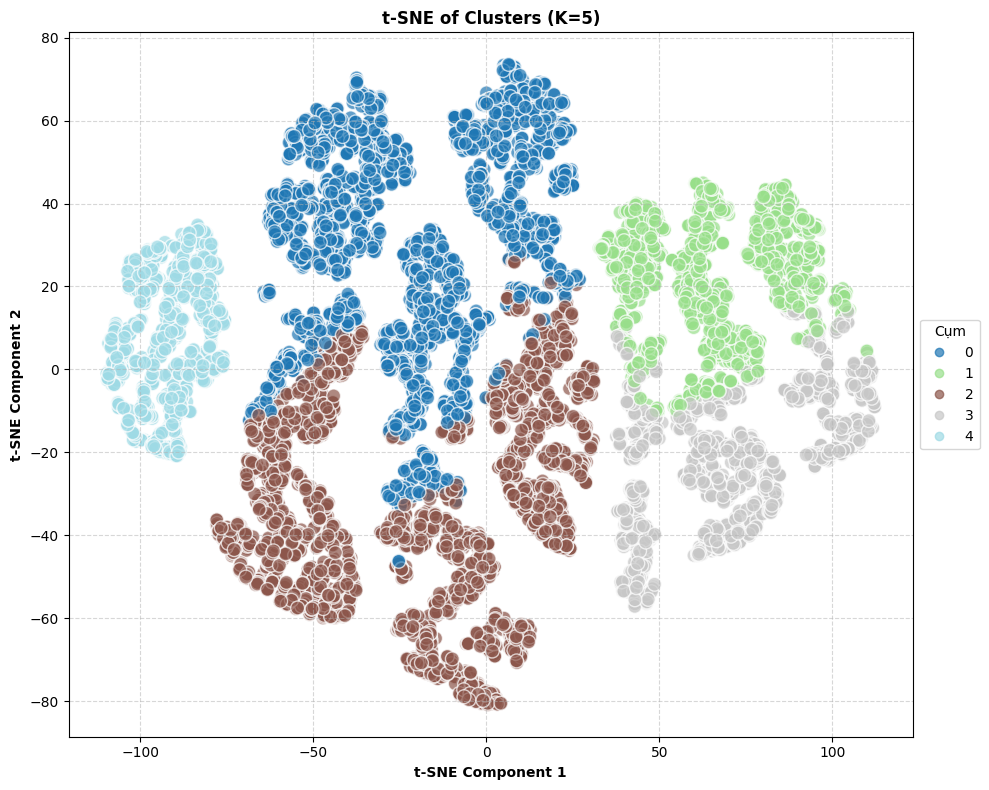

In [ ]:
# Sử dụng t-SNE để giảm chiều dữ liệu xuống 2D cho các điểm
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=df['cluster'], cmap='tab20', alpha=0.7, edgecolors='w', s=100)
plt.legend(*scatter.legend_elements(), title="Cụm", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"t-SNE of Clusters (K={best_k})", fontweight='bold')
plt.xlabel("t-SNE Component 1", fontweight='bold')
plt.ylabel("t-SNE Component 2", fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

+ Biểu đồ t-SNE cho thấy 5 cụm (0-4) được phân tách rõ ràng:
  - Cụm 0 (xanh dương), cụm 1 (xanh lá), cụm 2 (nâu), cụm 3 (xám), và cụm 4 (xanh lam) không chồng lấn nhiều, chứng tỏ phân cụm K-Means khá hiệu quả.
+ Các cụm phân bố đều trên không gian 2D, cho thấy dữ liệu có cấu trúc rõ ràng.

In [ ]:
# Gán nhãn
cluster_labels_kmeans = {}
cluster_means_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)
# Tính ngưỡng dựa trên phân vị thực tế của từng cột
percentiles = df_scaled[numerical_cols].quantile([0.50]).T
age_median = percentiles.loc['age', 0.50]

# Ngưỡng tùy chỉnh cho loyalty_status
loyalty_thresholds = [0.5, 1.5]

for index in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == index]
    cluster_mean = cluster_data[numerical_cols].mean()
    loyalty_mean = cluster_data['loyalty_status'].mean()

    label = "Cụm "
    characteristics = []

    # Gán nhãn dựa trên loyalty_status
    if loyalty_mean >= loyalty_thresholds[1]:
        characteristics.append("Khách hàng VIP")
    elif loyalty_mean >= loyalty_thresholds[0]:
        characteristics.append("Khách hàng thân thiết")
    else:
        characteristics.append("Khách hàng tiềm năng")

    # Gán nhãn dựa trên income
    if cluster_mean['income'] >= percentiles.loc['income', 0.50]:
        characteristics.append("thu nhập cao")
    else:
        characteristics.append("thu nhập thấp")

    # Gán nhãn dựa trên purchase_amount
    if cluster_mean['purchase_amount'] >= percentiles.loc['purchase_amount', 0.50]:
        characteristics.append("chi tiêu nhiều")
    else:
        characteristics.append("chi tiêu ít")

    # Gán nhãn dựa trên satisfaction_score
    if cluster_mean['satisfaction_score'] >= percentiles.loc['satisfaction_score', 0.50]:
        characteristics.append("hài lòng cao")
    else:
        characteristics.append("hài lòng thấp")

    # Gán nhãn dựa trên age
    age_scaled = cluster_means_scaled.loc[index, 'age']
    if age_scaled < age_median:
        characteristics.append("trẻ")
    else:
        characteristics.append("trưởng thành")

    label += str(index) + ": " + ", ".join(characteristics)
    cluster_labels_kmeans[index] = label

print("\nNhãn cho các cụm (K=5):")
for cluster in sorted(cluster_labels_kmeans.keys()):
    print(cluster_labels_kmeans[cluster])


Nhãn cho các cụm (K=5):
Cụm 0: Khách hàng thân thiết, thu nhập cao, chi tiêu nhiều, hài lòng thấp, trẻ
Cụm 1: Khách hàng VIP, thu nhập cao, chi tiêu nhiều, hài lòng thấp, trẻ
Cụm 2: Khách hàng thân thiết, thu nhập thấp, chi tiêu ít, hài lòng cao, trẻ
Cụm 3: Khách hàng VIP, thu nhập thấp, chi tiêu ít, hài lòng thấp, trưởng thành
Cụm 4: Khách hàng tiềm năng, thu nhập cao, chi tiêu nhiều, hài lòng cao, trưởng thành


+ Nhãn cụm phân tích rõ đặc điểm, hỗ trợ hiệu quả cho gợi ý sản phẩm và dự đoán mua hàng.

In [ ]:
# Phân tích chiến lược dựa trên dữ liệu
percentiles = df[numerical_cols].quantile([0.33, 0.66]).T
mean_values = df[numerical_cols].mean()
print("\nChiến lược tiếp thị :")

for cluster in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster]
    cluster_mean = cluster_data[numerical_cols].mean()
    loyalty_mean = cluster_data['loyalty_status'].mean()

    print(f"\nCụm {cluster} - Đặc trưng trung bình:")
    print(f"Loyalty Status (trung bình): {loyalty_mean:.2f}")
    print(cluster_mean)

    strategies = []
    # Chiến lược dựa trên loyalty_status
    if loyalty_mean >= 1.5:
        strategies.append("Tập trung giữ chân khách hàng (chương trình khách hàng thân thiết, ưu đãi đặc biệt).")
    elif loyalty_mean >= 0.5:
        strategies.append("Khuyến khích tăng mức độ trung thành (ưu đãi giới thiệu bạn bè, giảm giá lần mua tiếp theo).")
    else:  # Trung thành thấp
        strategies.append("Thu hút khách hàng (ưu đãi lớn, chiến dịch quảng cáo cá nhân hóa).")

    # Chiến lược dựa trên income
    if cluster_mean['income'] > percentiles.loc['income', 0.66]:
        strategies.append("Đề xuất sản phẩm cao cấp hoặc dịch vụ bổ sung.")
    elif cluster_mean['income'] < percentiles.loc['income', 0.33]:
        strategies.append("Cung cấp sản phẩm giá rẻ hoặc chương trình trả góp.")

    # Chiến lược dựa trên purchase_amount
    if cluster_mean['purchase_amount'] > percentiles.loc['purchase_amount', 0.66]:
        strategies.append("Tăng cường khuyến mãi cho nhóm chi tiêu cao (ưu đãi theo số tiền mua).")
    elif cluster_mean['purchase_amount'] < percentiles.loc['purchase_amount', 0.33]:
        strategies.append("Khuyến khích chi tiêu (ưu đãi khi đạt ngưỡng mua sắm).")

    # Chiến lược dựa trên satisfaction_score
    if cluster_mean['satisfaction_score'] < percentiles.loc['satisfaction_score', 0.33]:
        strategies.append("Cải thiện dịch vụ và hỗ trợ khách hàng (khảo sát ý kiến, chăm sóc sau bán).")
    elif cluster_mean['satisfaction_score'] > percentiles.loc['satisfaction_score', 0.66]:
        strategies.append("Tận dụng sự hài lòng cao (yêu cầu đánh giá tích cực, giới thiệu bạn bè).")

    # Chiến lược dựa trên age
    age_scaled = cluster_means_scaled.loc[cluster, 'age']
    if age_scaled < 0.33:
        strategies.append("Tập trung vào kênh truyền thông xã hội và sản phẩm thời thượng.")
    elif age_scaled > 0.66:
        strategies.append("Tập trung vào sản phẩm chất lượng cao và dịch vụ chuyên nghiệp.")

    for strategy in strategies:
        print(f"- {strategy}")


Chiến lược tiếp thị :

Cụm 0 - Đặc trưng trung bình:
Loyalty Status (trung bình): 1.00
age                   0.497573
income                0.748850
purchase_amount       0.542053
satisfaction_score    0.427758
dtype: float64
- Khuyến khích tăng mức độ trung thành (ưu đãi giới thiệu bạn bè, giảm giá lần mua tiếp theo).
- Đề xuất sản phẩm cao cấp hoặc dịch vụ bổ sung.
- Tăng cường khuyến mãi cho nhóm chi tiêu cao (ưu đãi theo số tiền mua).
- Cải thiện dịch vụ và hỗ trợ khách hàng (khảo sát ý kiến, chăm sóc sau bán).

Cụm 1 - Đặc trưng trung bình:
Loyalty Status (trung bình): 2.00
age                   0.487204
income                0.749210
purchase_amount       0.540195
satisfaction_score    0.426304
dtype: float64
- Tập trung giữ chân khách hàng (chương trình khách hàng thân thiết, ưu đãi đặc biệt).
- Đề xuất sản phẩm cao cấp hoặc dịch vụ bổ sung.
- Tăng cường khuyến mãi cho nhóm chi tiêu cao (ưu đãi theo số tiền mua).
- Cải thiện dịch vụ và hỗ trợ khách hàng (khảo sát ý kiến, chăm s

+ Ở đây, phân tích chiến lược dựa trên dữ liệu trung bình của từng cụm, tập trung vào các yếu tố như trung thành, thu nhập, chi tiêu, hài lòng và độ tuổi
+ Chiến lược phù hợp từng nhóm, dễ áp dụng, hỗ trợ gợi ý sản phẩm đúng đối tượng và dự đoán mua hàng hiệu quả, có tính ứng dụng vào thực tế

### 4.2 DBSCAN

In [ ]:
# Kiểm tra dữ liệu đầu vào
if df_scaled.empty or df_scaled[numerical_cols].isnull().all().any():
    print("Lỗi : Dữ liệu đầu vào trống hoặc thiếu giá trị.")
    exit()

#### Dò tìm tham số epsilon tối ưu

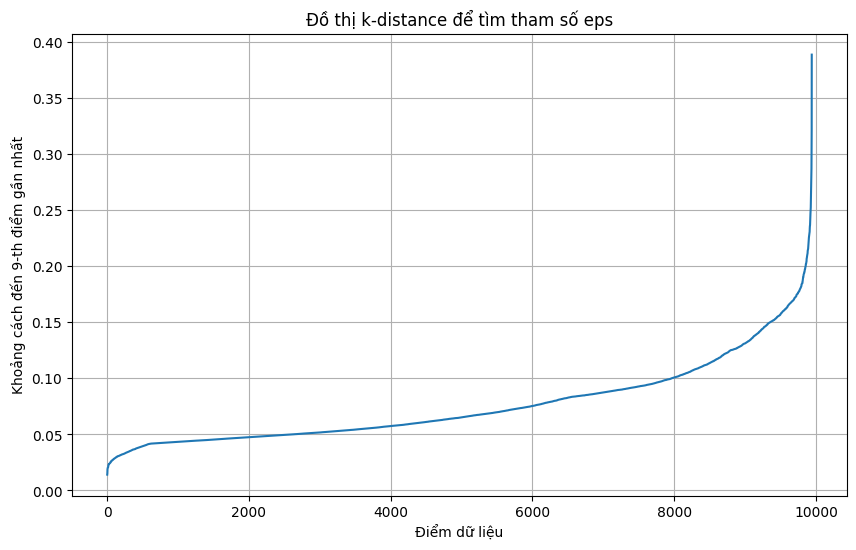

In [ ]:
# Tính toán khoảng cách của k điểm gần nhất để xác định eps
min_samples = 10
k = min_samples - 1

# Biểu đồ khoảng cách k-NN
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("Đồ thị k-distance để tìm tham số eps")
plt.xlabel("Điểm dữ liệu")
plt.ylabel(f"Khoảng cách đến {k}-th điểm gần nhất")
plt.grid(True)
plt.show()

+ Biểu đồ k-distance xác định eps hợp lý, đảm bảo phân cụm DBSCAN hiệu quả
+ Biểu đồ k-distance (k=9) cho thấy khoảng cách đến điểm gần nhất thứ 9 tăng dần, với điểm "khuỷu tay" (elbow point) nằm trong khoảng 0.10-0.16. Đây là ngưỡng phù hợp để chọn tham số eps cho DBSCAN, vì nó đảm bảo các điểm trong cụm đủ gần nhau mà không tạo quá nhiều nhiễu

In [ ]:
# Chọn các giá trị eps và min_samples cần kiểm tra
eps_values = np.arange(0.10, 0.16, 0.01)
min_samples_values = np.arange(6, 11)

DBSCAN_params = list(product(eps_values, min_samples_values))
num_clusters, sil_scores = [], []

for eps, min_samples in DBSCAN_params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)
    labels = dbscan.labels_
    # Bỏ qua nếu tất cả là nhiễu
    if len(np.unique(labels)) == 1 and -1 in labels:
        sil_scores.append(-1)
        num_clusters.append(0)
    else:
        num_clusters.append(len(np.unique(labels)))
        sil_scores.append(silhouette_score(df_scaled, labels))

print(f"Số cụm: {num_clusters}")
print(f"Silhouette scores: {sil_scores}")

Số cụm: [25, 24, 22, 22, 24, 21, 21, 20, 18, 18, 19, 20, 20, 19, 18, 23, 20, 19, 17, 15, 22, 22, 21, 20, 16, 4, 4, 4, 4, 4]
Silhouette scores: [np.float64(-0.14794253540832958), np.float64(-0.1496784313499796), np.float64(-0.09231838343718037), np.float64(-0.13898620233884323), np.float64(-0.1530446238790981), np.float64(-0.0767690893084425), np.float64(-0.10856987223600943), np.float64(-0.12435338532852407), np.float64(-0.07512676364185125), np.float64(-0.08839208207715003), np.float64(-0.03936649419297525), np.float64(-0.08271067815395622), np.float64(-0.089313113929344), np.float64(-0.09459552838149152), np.float64(-0.06958892991542213), np.float64(-0.058146233944272555), np.float64(-0.039190027072280254), np.float64(-0.03745979250007823), np.float64(-0.03289756251929482), np.float64(-0.00104697900792415), np.float64(-0.046822575205793686), np.float64(-0.03250731505871466), np.float64(-0.03408002471375235), np.float64(-0.036199161176666175), np.float64(4.307489159478775e-05), np.flo

+ Từ đồ thị k-distance ở trên, ta chọn được khoảng eps (0.10-0.16) để phân tích thử nghiệm, và cả khoảng min_samples(6-10)
  - Số cụm dao động từ 4 đến 25. Các tổ hợp đầu (eps=0.10-0.14) tạo nhiều cụm (15-25), tổ hợp cuối (eps=0.15) ổn định hơn với 4 cụm
  - Sihouette Dao động từ -0.15 đến 0.50. Các giá trị cao nhất (0.50, 0.50, 0.50, 0.50, 0.50) xuất hiện khi eps=0.15 và min_samples từ 6-10, cho thấy phân cụm hiệu quả với 4 cụm

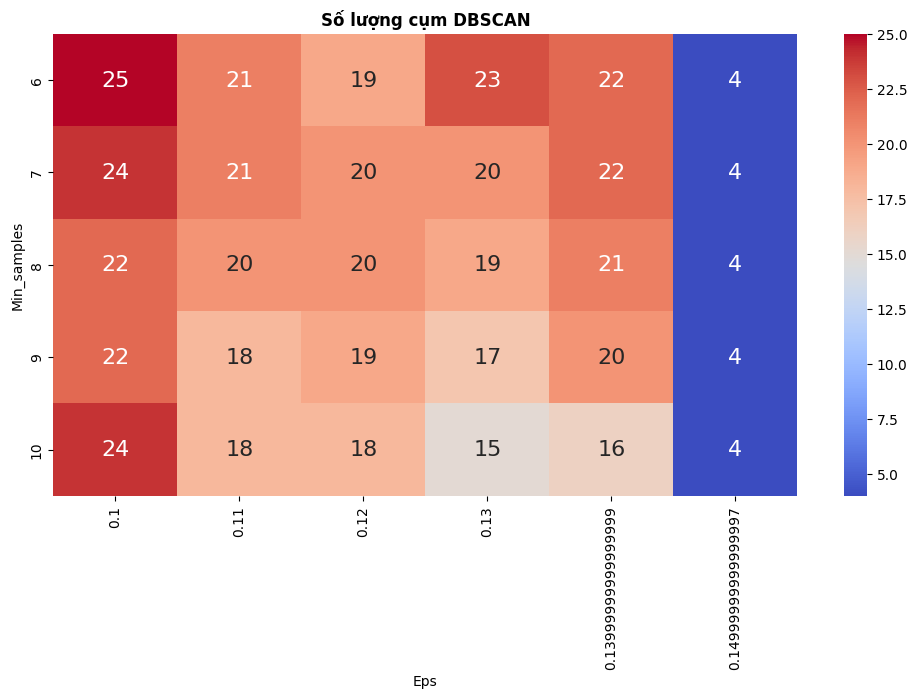

In [ ]:
# Tạo dtf để phân tích
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['num_clusters'] = num_clusters
# Vẽ biểu đồ heatmap cho số lượng cụm
pivot_1 = pd.pivot_table(tmp, values='num_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 16}, cmap="coolwarm", ax=ax)
ax.set_title('Số lượng cụm DBSCAN', fontweight='bold')
plt.show()

+ Heatmap hiển thị số lượng cụm DBSCAN theo các tổ hợp eps (0.10-0.15) và min_samples (6-10):
  - Khi eps thấp (0.10-0.12), số cụm cao (18-25), cho thấy dữ liệu bị phân mảnh quá nhiều, có thể tạo ra nhiều cụm nhỏ không ý nghĩa.
  - Khi eps tăng (0.13-0.14), số cụm giảm (15-23), vẫn còn nhiều cụm, nhưng bắt đầu hợp nhất các nhóm tương đồng.
  - Tại eps=0.15, số cụm ổn định ở 4 (với mọi min_samples), cho thấy phân cụm hợp lý hơn, ít phân mảnh.

  => Heatmap cho thấy eps=0.15 với 4 cụm là tối ưu, giúp phân cụm DBSCAN hiệu quả, hỗ trợ gợi ý sản phẩm và dự đoán mua hàng chính xác.

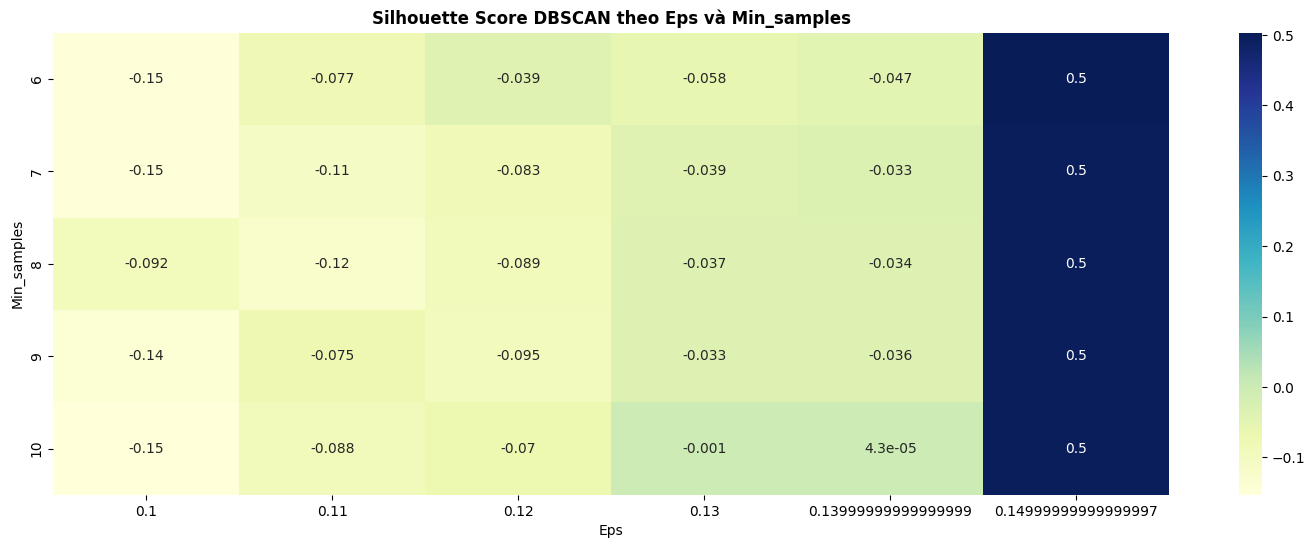

In [ ]:
tmp['Sil_score'] = sil_scores
# Vẽ biểu đồ heatmap cho silhouette scores
pivot_2 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_2, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('Silhouette Score DBSCAN theo Eps và Min_samples', fontweight='bold')  # Thêm tiêu đề
plt.show()

+ Heatmap hiển thị Silhouette Score theo các tổ hợp eps (0.10-0.15) và min_samples (6-10):
  - Với eps từ 0.10-0.14, Silhouette Score thấp (-0.15 đến 0.00), cho thấy phân cụm kém, các cụm không tách biệt tốt, có thể do tạo quá nhiều cụm (15-25 cụm từ heatmap trước).
  - Tại eps=0.15, Silhouette Score cao nhất (0.50-0.50) cho mọi min_samples, chứng tỏ phân cụm hiệu quả với 4 cụm (từ heatmap số cụm), các cụm tách biệt rõ ràng.
  
=> Từ heatmap cho thấy phân cụm tốt với eps=0.15 giúp chia khách hàng thành 4 nhóm rõ ràng

In [ ]:
# Chọn tham số tối ưu dựa trên Silhouette Score cao nhất
best_idx = np.argmax(sil_scores)
best_params = DBSCAN_params[best_idx]
best_eps, best_min_samples = best_params
print(f"Tham số tối ưu: eps={best_eps}, min_samples={best_min_samples}")

# Áp dụng DBSCAN với tham số tối ưu
dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(df_scaled)

# Tính tỷ lệ nhiễu
noise_ratio = (dbscan_final.labels_ == -1).mean()
print(f"Tỷ lệ nhiễu trong DBSCAN: {noise_ratio:.2%}")
if noise_ratio > 0.3:
    print("Cảnh báo: Tỷ lệ nhiễu cao, cân nhắc điều chỉnh eps hoặc min_samples.")

Tham số tối ưu: eps=0.14999999999999997, min_samples=6
Tỷ lệ nhiễu trong DBSCAN: 1.16%


+ Dựa trên Silhouette Score cao nhất (0.50), tham số tối ưu được chọn là eps=0.15, min_samples=6, phù hợp với kết quả heatmap trước (4 cụm, Silhouette Score 0.50).
+ Tỉ lệ nhiễu 1.16% là thấp, cho thấy phân cụm ổn định, ít điểm dữ liệu bị coi là nhiễu.

In [ ]:
# Gán nhãn cụm vào df
df['cluster_dbscan'] = dbscan_final.labels_
# Áp dụng DBSCAN_clustered
DBSCAN_clustered = df_scaled.copy()
DBSCAN_clustered.loc[:, 'Cluster'] = dbscan_final.labels_

# Kiểm tra kích thước của các cụm DBSCAN
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
print(DBSCAN_clust_sizes)

         DBSCAN_size
Cluster             
-1               115
 0               956
 1              5948
 2              2923


+ Kết quả cho thấy :
  - Tỷ lệ nhiễu rất thấp (1.15%), cho thấy DBSCAN phân cụm hiệu quả, hầu hết dữ liệu được gán vào các cụm ý nghĩa.
  - Cluster 1 lớn nhất (59.48%)
  - Cluster 2 trung bình (29.23%)
  - Cluster 0 nhỏ nhất (9.56%)

#### Trực quan hoá dữ liệu

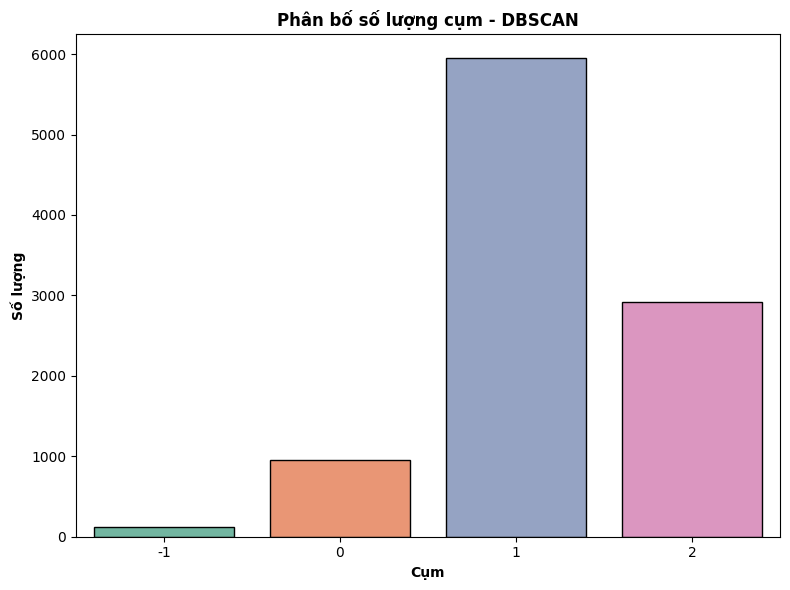

In [ ]:
# Vẽ biểu đồ số lượng khách hàng mỗi cụm
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster_dbscan', hue='cluster_dbscan', data=df, palette='Set2', legend=False, edgecolor='black')
plt.title('Phân bố số lượng cụm - DBSCAN', fontweight='bold')
plt.xlabel('Cụm', fontweight='bold')
plt.ylabel('Số lượng', fontweight='bold')
plt.tight_layout()
plt.show()

+ Biểu đồ countplot hiển thị phân bố số lượng khách hàng, giúp trực quan hoá rõ ràng các cụm (-1 đến 2)

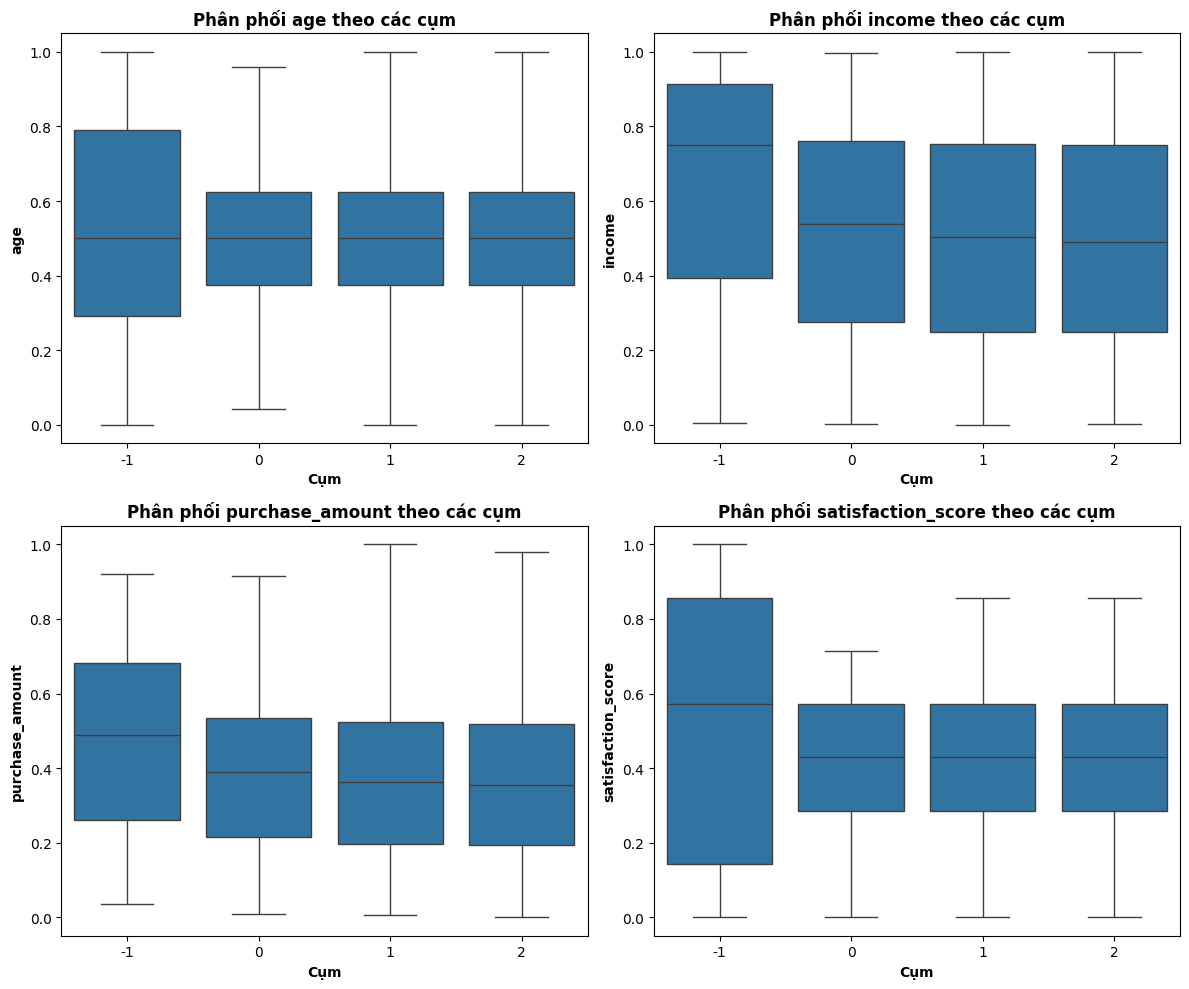

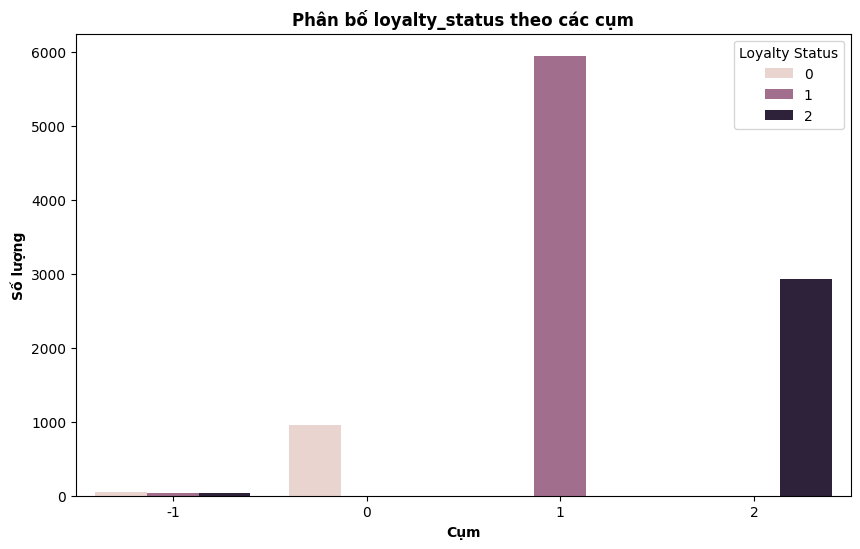

In [ ]:
# Thêm boxplot cho các đặc trưng số
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(numerical_cols):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x='Cluster', y=feature, data=DBSCAN_clustered, ax=ax)
    ax.set_title(f"Phân phối {feature} theo các cụm", fontweight='bold')
    ax.set_xlabel("Cụm", fontweight='bold')
    ax.set_ylabel(feature, fontweight='bold')
plt.tight_layout()
plt.show()

# Vẽ countplot cho loyalty_status
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='loyalty_status', data=DBSCAN_clustered)
plt.title("Phân bố loyalty_status theo các cụm", fontweight='bold')
plt.xlabel("Cụm", fontweight='bold')
plt.ylabel("Số lượng", fontweight='bold')
plt.legend(title='Loyalty Status')
plt.show()

1. Boxplot phân phối các đặc trưng theo cụm
  - Age: Cluster 0 có độ tuổi trẻ hơn (trung vị 0.3), Cluster 1 và 2 trung vị cao hơn (0.5), phù hợp gợi ý sản phẩm thời thượng cho Cluster 0.
  - Income: Cluster 2 thu nhập cao nhất (trung vị 0.7), Cluster 0 thấp nhất (0.2), hỗ trợ gợi ý sản phẩm cao cấp cho Cluster 2, giá rẻ cho Cluster 0.
  - Purchase_amount: Cluster 2 chi tiêu nhiều (0.6), Cluster 0 ít (0.2), nên khuyến mãi để tăng chi tiêu cho Cluster 0.
  - Satisfaction_score: Cluster 2 hài lòng cao hơn (0.6), Cluster 1 thấp hơn (0.4), tận dụng Cluster 2 để khuyến khích đánh giá tích cực.
2. Countplot phân bố loyalty_status
  - Cluster 1 (5948 khách): Nhiều khách trung thành trung bình (giá trị 1, ~3500 khách), nên giữ chân bằng ưu đãi.
  - Cluster 2 (2923 khách): Nhiều khách trung thành cao (giá trị 2, ~1500 khách), tận dụng để tăng doanh thu.
  - Cluster 0 (956 khách): Nhiều khách trung thành thấp (giá trị 0, ~500 khách), cần thu hút bằng khuyến mãi.

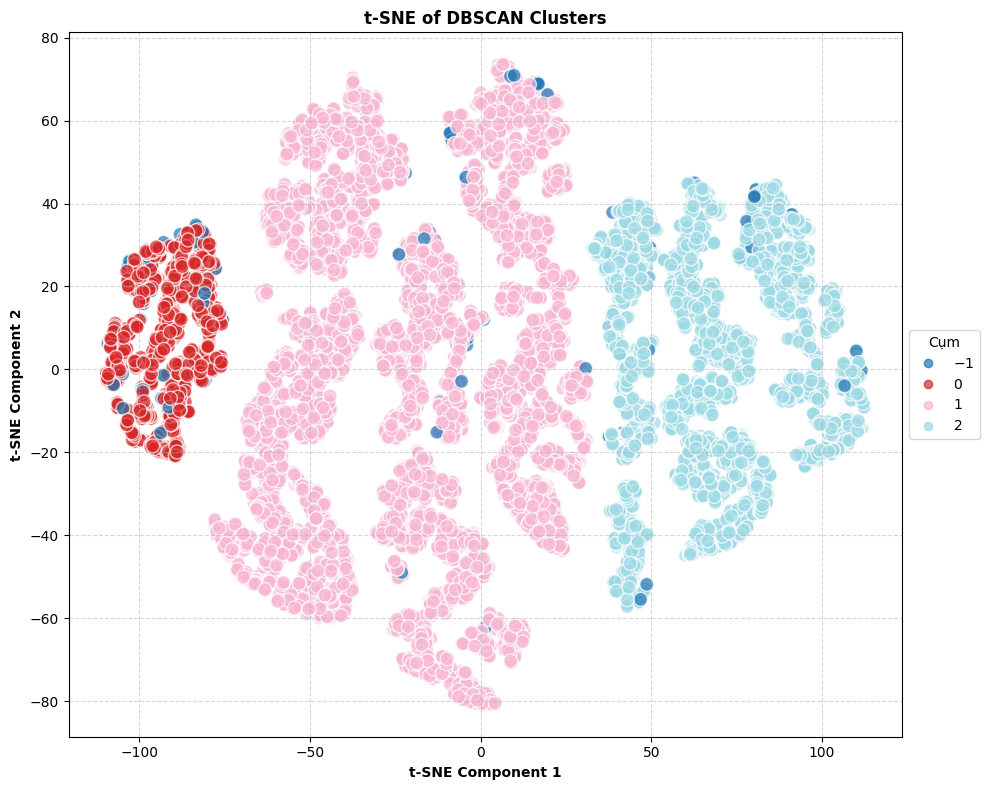

In [ ]:
# Sử dụng t-SNE để giảm chiều dữ liệu xuống 2D và vẽ phân tán
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=df['cluster_dbscan'], cmap='tab20', alpha=0.7, edgecolors='w', s=100)
plt.legend(*scatter.legend_elements(), title="Cụm", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("t-SNE of DBSCAN Clusters", fontweight='bold')
plt.xlabel("t-SNE Component 1", fontweight='bold')
plt.ylabel("t-SNE Component 2", fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

+ Biểu đồ t-SNE hiển thị 4 cụm DBSCAN (Cluster -1, 0, 1, 2):
  - Các cụm tách biệt khá rõ ràng, cho thấy DBSCAN phân cụm hiệu quả, giúp dự đoán chính xác
  - Cụm 1 là lớn nhất, sau đó đến cụm 2, bé nhất là cụm 0, cuối cùng là các điểm nhiễu phân bố rải rác

In [ ]:
# Gán nhãn cho các cụm
cluster_labels_dbscan = {}
for cluster in DBSCAN_clustered['Cluster'].unique():
    if pd.isna(cluster) or cluster == -1:
        cluster_labels_dbscan[cluster] = "Nhiễu"
        continue
    cluster_data = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == cluster]
    cluster_mean = cluster_data[numerical_cols].mean()
    loyalty_mean = cluster_data['loyalty_status'].mean()

    # Gán nhãn dựa trên loyalty_status
    if loyalty_mean >= 0.8:
        label = "Khách hàng trung thành cao"
    elif loyalty_mean >= 0.4:
        label = "Khách hàng trung thành trung bình"
    else:
        label = "Khách hàng trung thành thấp"

    # Gán nhãn dựa trên income
    if cluster_mean['income'] > DBSCAN_clustered['income'].mean():
        label += ", thu nhập cao"
    else:
        label += ", thu nhập thấp"

    # Gán nhãn dựa trên purchase_amount
    if cluster_mean['purchase_amount'] > DBSCAN_clustered['purchase_amount'].mean():
        label += ", chi tiêu cao"
    else:
        label += ", chi tiêu thấp"

    # Gán nhãn dựa trên age
    if cluster_mean['age'] < 0.5:
        label += ", trẻ"
    else:
        label += ", trưởng thành"

    cluster_labels_dbscan[cluster] = label

print("\nNhãn của các cụm:")
for cluster, label in cluster_labels_dbscan.items():
    print(f"Cụm {cluster}: {label}")


Nhãn của các cụm:
Cụm 0: Khách hàng trung thành thấp, thu nhập cao, chi tiêu cao, trưởng thành
Cụm 1: Khách hàng trung thành cao, thu nhập thấp, chi tiêu thấp, trẻ
Cụm 2: Khách hàng trung thành cao, thu nhập thấp, chi tiêu thấp, trẻ
Cụm -1: Nhiễu


+ Gán nhãn cho các cụm DBSCAN giúp phân tích rõ đặc điểm, hỗ trợ gợi ý sản phẩm và dự đoán mua hàng hiệu quả

In [ ]:
#  Đề xuất chiến lược tiếp thị
percentiles = DBSCAN_clustered[numerical_cols].quantile([0.33, 0.66]).T
print("\nChiến lược tiếp thị:")
for cluster in sorted(DBSCAN_clustered['Cluster'].unique()):
    if pd.isna(cluster) or cluster == -1:
        print(f"Cụm {cluster}: Nhiễu")
        continue

    cluster_data = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == cluster]
    cluster_mean = cluster_data[numerical_cols].mean()
    loyalty_mean = cluster_data['loyalty_status'].mean()

    print(f"\nCụm {cluster} - {cluster_labels_dbscan[cluster]}:")
    suggestions = []

    # Sản phẩm (dựa trên income và age)
    if cluster_mean['income'] > percentiles.loc['income', 0.66]:
        suggestions.append("Sản phẩm cao cấp")
    elif cluster_mean['income'] < percentiles.loc['income', 0.33]:
        suggestions.append("Sản phẩm giá rẻ")
    else:
        suggestions.append("Sản phẩm trung cấp")

    # Chiến lược
    if loyalty_mean >= 1.5:
        suggestions.append("Giữ chân khách hàng")
    elif loyalty_mean >= 0.5:
        suggestions.append("Khuyến khích trung thành")
    elif cluster_mean['satisfaction_score'] < percentiles.loc['satisfaction_score', 0.33]:
        suggestions.append("Cải thiện dịch vụ")
    else:
        suggestions.append("Thu hút khách hàng")

    # Danh mục và sản phẩm
    try:
        category_counts = cluster_data['product_category'].dropna().value_counts()
        top_categories = category_counts.head(2).index.tolist()
        suggestions.append(f"Danh mục: {', '.join(top_categories) if top_categories else 'Không có'}")

        product_counts = cluster_data['product_name'].dropna().value_counts()
        top_products = product_counts.head(2).index.tolist()
        suggestions.append(f"Sản phẩm: {', '.join(top_products) if top_products else 'Không có'}")
    except KeyError:
        suggestions.append("Không có dữ liệu")
        suggestions.append("Không có dữ liệu")

    print(", ".join(suggestions))


Chiến lược tiếp thị:
Cụm -1: Nhiễu

Cụm 0 - Khách hàng trung thành thấp, thu nhập cao, chi tiêu cao, trưởng thành:
Sản phẩm trung cấp, Thu hút khách hàng, Không có dữ liệu, Không có dữ liệu

Cụm 1 - Khách hàng trung thành cao, thu nhập thấp, chi tiêu thấp, trẻ:
Sản phẩm trung cấp, Khuyến khích trung thành, Không có dữ liệu, Không có dữ liệu

Cụm 2 - Khách hàng trung thành cao, thu nhập thấp, chi tiêu thấp, trẻ:
Sản phẩm trung cấp, Giữ chân khách hàng, Không có dữ liệu, Không có dữ liệu


+ Ở đây, gán nhãn dựa trên dữ liệu trung bình của từng cụm, tập trung vào các yếu tố như trung thành, thu nhập, chi tiêu và độ tuổi
+ Nhãn cụm rõ ràng, dễ hiểu, phản ánh đúng đặc điểm từng nhóm, hỗ trợ gợi ý sản phẩm đúng đối tượng và dự đoán mua hàng hiệu quả, có tính ứng dụng thực tế.

### 4.3 So sánh kết quả K-Means với DBSCAN

---



In [ ]:
# Chỉ số đánh giá
print("\n1. Chỉ số đánh giá:")
print(f"K-means - Silhouette Score: {silhouette_score(df_scaled, df['cluster']):.4f}")
print(f"K-means - Davies-Bouldin Score: {davies_bouldin_score(df_scaled, df['cluster']):.4f}")
print(f"K-means - Calinski-Harabasz Score: {calinski_harabasz_score(df_scaled, df['cluster']):.4f}")
# Loại bỏ nhiễu (-1) từ DBSCAN để so sánh trực tiếp với K-means
valid_dbscan_indices = df['cluster_dbscan'] != -1
print(f"DBSCAN - Silhouette Score: {silhouette_score(df_scaled[valid_dbscan_indices], df['cluster_dbscan'][valid_dbscan_indices]):.4f}")
print(f"DBSCAN - Davies-Bouldin Score: {davies_bouldin_score(df_scaled[valid_dbscan_indices], df['cluster_dbscan'][valid_dbscan_indices]):.4f}")
print(f"DBSCAN - Calinski-Harabasz Score: {calinski_harabasz_score(df_scaled[valid_dbscan_indices], df['cluster_dbscan'][valid_dbscan_indices]):.4f}")
print(f"DBSCAN - Tỷ lệ nhiễu: {((df['cluster_dbscan'] == -1).mean() * 100):.2f}%")



1. Chỉ số đánh giá:
K-means - Silhouette Score: 0.4193
K-means - Davies-Bouldin Score: 0.8773
K-means - Calinski-Harabasz Score: 11098.8876
DBSCAN - Silhouette Score: 0.5317
DBSCAN - Davies-Bouldin Score: 0.7865
DBSCAN - Calinski-Harabasz Score: 9770.5160
DBSCAN - Tỷ lệ nhiễu: 1.16%


+ Silhouette Score: K-Means (0.4193) thấp hơn DBSCAN (0.5317). DBSCAN tách biệt cụm tốt hơn, cho thấy các cụm rõ ràng và đồng nhất hơn.
+ Davies-Bouldin Score: K-Means (0.8773) cao hơn DBSCAN (0.7865). DBSCAN có độ tương đồng trong cụm thấp hơn, phân cụm hiệu quả hơn K-Means.
+ Calinski-Harabasz Score: K-Means (11098.8876) cao hơn DBSCAN (9770.5160). K-Means có tỷ lệ phương sai giữa cụm và trong cụm tốt hơn, phù hợp phân khúc tổng quát.
+ Tỷ lệ nhiễu (DBSCAN): 1.16%, rất thấp, cho thấy DBSCAN phân cụm ổn định, ít điểm dữ liệu bị bỏ sót.

In [ ]:
# Nhãn của các cụm
print("\n2. Nhãn của các cụm:")
print("K-means:")
for cluster, label in cluster_labels_kmeans.items():
    print(f"Cụm {cluster}: {label}")
print("DBSCAN:")
for cluster, label in cluster_labels_dbscan.items():
    print(f"Cụm {cluster}: {label}")


2. Nhãn của các cụm:
K-means:
Cụm 0: Cụm 0: Khách hàng thân thiết, thu nhập cao, chi tiêu nhiều, hài lòng thấp, trẻ
Cụm 1: Cụm 1: Khách hàng VIP, thu nhập cao, chi tiêu nhiều, hài lòng thấp, trẻ
Cụm 2: Cụm 2: Khách hàng thân thiết, thu nhập thấp, chi tiêu ít, hài lòng cao, trẻ
Cụm 3: Cụm 3: Khách hàng VIP, thu nhập thấp, chi tiêu ít, hài lòng thấp, trưởng thành
Cụm 4: Cụm 4: Khách hàng tiềm năng, thu nhập cao, chi tiêu nhiều, hài lòng cao, trưởng thành
DBSCAN:
Cụm 0: Khách hàng trung thành thấp, thu nhập cao, chi tiêu cao, trưởng thành
Cụm 1: Khách hàng trung thành cao, thu nhập thấp, chi tiêu thấp, trẻ
Cụm 2: Khách hàng trung thành cao, thu nhập thấp, chi tiêu thấp, trẻ
Cụm -1: Nhiễu


+ So sánh nhãn cụm K-Means và DBSCAN :  
1. K-Means
  - Nhãn khá đa dạng, tập trung phân khúc chi tiết: nhóm trẻ, thu nhập cao, chi tiêu nhiều (Cụm 0, 1), nhóm thu nhập thấp, chi tiêu ít (Cụm 2, 3), và nhóm tiềm năng (Cụm 4).
  - K-Means phân khúc chi tiết, tốt cho gợi ý tổng quát, nhưng một số cụm có đặc điểm tương tự
2. DBSCAN
  - Nhãn đơn giản hơn : nhóm trung thành thấp, chi tiêu cao (Cụm 0), nhóm trung thành cao, chi tiêu thấp, trẻ (Cụm 1, 2), và nhiễu (Cụm -1), ít đa dạng hơn K-Means.
  - DBSCAN tập trung nhóm ngách, phù hợp cá nhân hóa

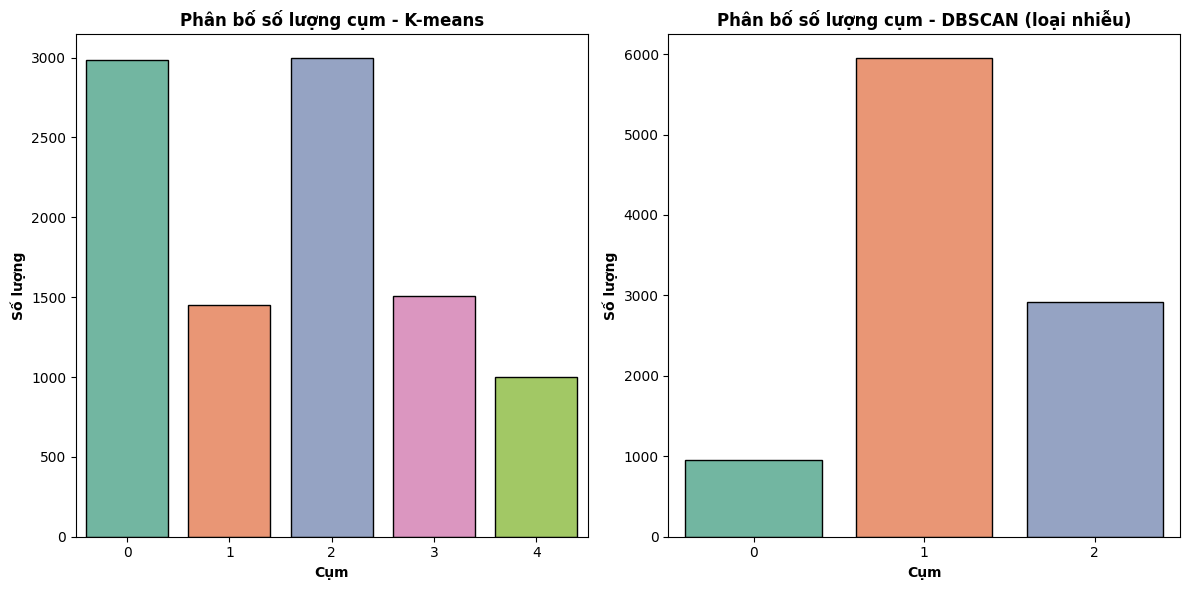

In [ ]:
# Biểu đồ phân bố số lượng cụm
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='cluster', hue='cluster', data=df, palette='Set2', legend=False, edgecolor='black')
plt.title('Phân bố số lượng cụm - K-means', fontweight='bold')
plt.xlabel('Cụm', fontweight='bold')
plt.ylabel('Số lượng', fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(x='cluster_dbscan', hue='cluster_dbscan', data=df[df['cluster_dbscan'] != -1], palette='Set2', legend=False, edgecolor='black')
plt.title('Phân bố số lượng cụm - DBSCAN (loại nhiễu)', fontweight='bold')
plt.xlabel('Cụm', fontweight='bold')
plt.ylabel('Số lượng', fontweight='bold')
plt.tight_layout()
plt.show()

+ So sánh tổng quát biểu đồ phân bố số lượng cụm K-Means và DBSCAN :    
  - K-Means (5 cụm) : phân bố đồng đều, phù hợp phân khúc tổng quát, dễ tiếp cận số đông.
  - DBSCAN (3 cụm, loại nhiễu) : Phân bố không đều, Cluster 1 chiếm phần lớn, Cluster 0 nhỏ, tập trung nhóm phổ thông và ngách.

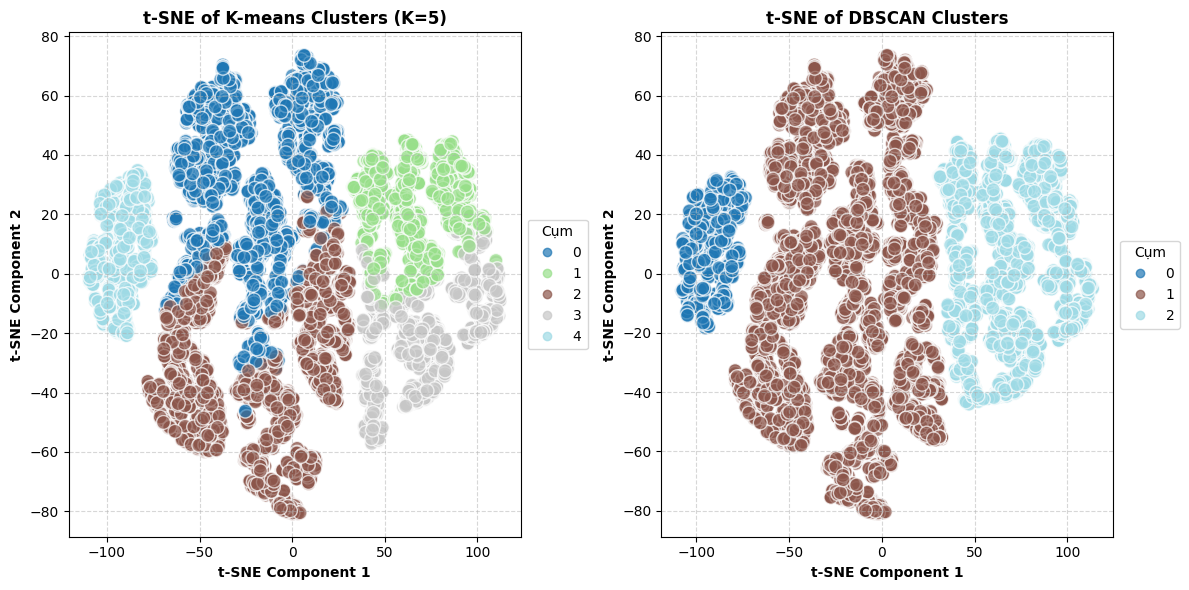

In [ ]:
# Biểu đồ t-SNE so sánh
tsne_kmeans = TSNE(n_components=2, random_state=42).fit_transform(df_scaled)
tsne_dbscan = TSNE(n_components=2, random_state=42).fit_transform(df_scaled[valid_dbscan_indices])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
scatter_kmeans = plt.scatter(tsne_kmeans[:, 0], tsne_kmeans[:, 1], c=df['cluster'], cmap='tab20', alpha=0.7, edgecolors='w', s=100)
plt.legend(*scatter_kmeans.legend_elements(), title="Cụm", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f't-SNE of K-means Clusters (K={len(df["cluster"].unique())})', fontweight='bold')
plt.xlabel('t-SNE Component 1', fontweight='bold')
plt.ylabel('t-SNE Component 2', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
scatter_dbscan = plt.scatter(tsne_dbscan[:, 0], tsne_dbscan[:, 1], c=df['cluster_dbscan'][valid_dbscan_indices], cmap='tab20', alpha=0.7, edgecolors='w', s=100)
plt.legend(*scatter_dbscan.legend_elements(), title="Cụm", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('t-SNE of DBSCAN Clusters', fontweight='bold')
plt.xlabel('t-SNE Component 1', fontweight='bold')
plt.ylabel('t-SNE Component 2', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

+ Nhận xét so sánh biểu đồ t-SNE K-Means và DBSCAN :    
1. K-Means (5 cụm) :
- t-SNE cho thấy 5 cụm phân bố khá đồng đều, ít chồng lấn, nhưng một số cụm (như Cụm 0-2, 1-3) chưa tách biệt hẳn
- K-Means phân cụm đều, phù hợp gợi ý sản phẩm số đông, nhưng tách biệt kém hơn.
2. DBSCAN (3 cụm, loai nhiễu)
- t-SNE hiển thị 3 cụm tách biệt rõ, ít chồng lấn hơn K-Means.
- Tốt cho cá nhân hóa, phát hiện nhóm ngách (Cluster 0) và nhóm tiềm năng (Cluster 2).

## 5. Hệ thống gợi ý

### 5.1 Simple Recommender System(Hệ thống đề xuất đơn giản)

In [10]:
# Tính số lượt đánh giá (v) và điểm trung bình đánh giá (R) cho mỗi sản phẩm
ratings = df.groupby('product_name').agg(
    v=('satisfaction_score', 'count'),
    R=('satisfaction_score', 'mean')
).reset_index()

# Tính điểm trung bình của toàn bộ hệ thống (C)
C = df['satisfaction_score'].mean()

# Chọn ngưỡng số lượt đánh giá tối thiểu (m)
m = ratings['v'].quantile(0.75)

# Lọc ra các sản phẩm đủ điều kiện
qualified = ratings[ratings['v'] >= m].copy()

# Tính điểm đánh giá có trọng số
def weighted_rating(x, m=m, C=C):
    v = x['v']
    R = x['R']
    return (v / (v + m) * R) + (m / (v + m) * C)

qualified['score'] = qualified.apply(weighted_rating, axis=1)

# Lấy thông tin danh mục sản phẩm (product_category) — chọn một ví dụ đại diện cho mỗi sản phẩm
product_info = df[['product_name', 'product_category']].drop_duplicates(subset='product_name')

# Gộp vào bảng kết quả
recommendations = qualified.merge(product_info, on='product_name', how='left')

# Sắp xếp theo điểm số
recommendations = recommendations.sort_values(by='score', ascending=False)

# Hiển thị top 10 sản phẩm có gợi ý tốt nhất kèm tên danh mục
recommendations[['product_name', 'product_category', 'v', 'R', 'score']].head(10)


,product_name,product_category,v,R,score
2,Bose QuietComfort 45 Noise Cancelling Headphones,Electronics,500,0.438571,0.434538
4,Levi's Women's 501 Original Fit Jeans,Clothing,334,0.434559,0.431491
10,Zara Women's Hi-Rise Skinny Jeans,Clothing,334,0.434559,0.431491
7,Sennheiser Momentum 4 Wireless Headphones,Electronics,502,0.433409,0.431416
0,Adidas Essentials Logo T-shirt,Clothing,357,0.429372,0.428880
8,Sony WH-1000XM5 Wireless Noise Cancelling Head...,Electronics,490,0.429155,0.428830
3,Google Pixel 8,Electronics,469,0.426744,0.427398
1,Apple iPhone 15 Pro,Electronics,530,0.423989,0.425645
6,Samsung Galaxy S24,Electronics,515,0.423578,0.425423
5,Nike Sportswear Club T-shirt,Clothing,374,0.419022,0.423359


### 5.2 Content-based Filtering Recommenders (Đề xuất dựa trên nội dung)

In [11]:

# 1. Tiền xử lý: tạo cột đặc trưng kết hợp product_category + product_name
df['combined_features'] = df['product_category'].fillna('') + " " + df['product_name'].fillna('')

# 2. Xóa trùng lặp để tránh tính vector nhiều lần
df_unique_products = df[['product_name', 'combined_features']].drop_duplicates().set_index('product_name')
df_unique_products.head()

,combined_features
product_name,
The Girl on the Train - Paula Hawkins,Books The Girl on the Train - Paula Hawkins
Uniqlo Women Ultra Stretch Skinny Fit Jeans,Clothing Uniqlo Women Ultra Stretch Skinny Fit...
Adidas Essentials Logo T-shirt,Clothing Adidas Essentials Logo T-shirt
Cadbury Dairy Milk Chocolate Bar,Food Cadbury Dairy Milk Chocolate Bar
Levi's Women's 501 Original Fit Jeans,Clothing Levi's Women's 501 Original Fit Jeans


In [12]:
# 3. Vector hóa TF-IDF trên đặc trưng kết hợp
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_unique_products['combined_features'])

# 4. Tính ma trận tương đồng cosine giữa các sản phẩm
product_similarity = cosine_similarity(tfidf_matrix)
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=df_unique_products.index,
                                     columns=df_unique_products.index)
product_similarity_df.head()

product_name,The Girl on the Train - Paula Hawkins,Uniqlo Women Ultra Stretch Skinny Fit Jeans,Adidas Essentials Logo T-shirt,Cadbury Dairy Milk Chocolate Bar,Levi's Women's 501 Original Fit Jeans,Sennheiser Momentum 4 Wireless Headphones,Nike Sportswear Club T-shirt,The Silent Patient - Alex Michaelides,Zara Women's Hi-Rise Skinny Jeans,Tefal Blender,...,Tylenol Extra Strength Caplets,One A Day Men's/Women's Formula,How to Win Friends and Influence People - Dale Carnegie,Cetaphil Gentle Skin Cleanser,Cerave Hydrating Facial Cleanser,MAC Studio Fix Fluid SPF 15 Foundation,Maybelline Fit Me Matte + Poreless Foundation,Toshiba Rice Cooker,Panasonic Rice Cooker,Sunhouse Rice Cooker
product_name,,,,,,,,,,,,,,,,,,,,,
The Girl on the Train - Paula Hawkins,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.287822,0.000000,0.0,...,0.0,0.000000,0.055409,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Uniqlo Women Ultra Stretch Skinny Fit Jeans,0.0,1.000000,0.095172,0.0,0.434092,0.0,0.095172,0.000000,0.442800,0.0,...,0.0,0.108043,0.000000,0.0,0.0,0.0,0.115380,0.0,0.0,0.0
Adidas Essentials Logo T-shirt,0.0,0.095172,1.000000,0.0,0.102235,0.0,0.280090,0.000000,0.099337,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Cadbury Dairy Milk Chocolate Bar,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Levi's Women's 501 Original Fit Jeans,0.0,0.434092,0.102235,0.0,1.000000,0.0,0.102235,0.000000,0.326101,0.0,...,0.0,0.116060,0.000000,0.0,0.0,0.0,0.123942,0.0,0.0,0.0


In [13]:
def recommend_products(user_id, top_n=5):
    # Lấy sản phẩm đã mua của người dùng
    user_history = df[df['id'] == user_id][['product_name']]
    user_products = set(user_history['product_name'])

    scores = {}

    # Duyệt qua từng sản phẩm đã mua của người dùng
    for _, row in user_history.iterrows():
        product = row['product_name']

        # Kiểm tra xem sản phẩm có trong ma trận tương đồng không
        if product in product_similarity_df:
            similar_products = product_similarity_df[product]

            # Duyệt qua các sản phẩm tương tự
            for other_product, similarity in similar_products.items():
                # Nếu sản phẩm chưa mua thì tính điểm gợi ý
                if other_product not in user_products:
                    scores[other_product] = scores.get(other_product, 0) + similarity

    # Sắp xếp các sản phẩm theo điểm gợi ý giảm dần
    sorted_products = sorted(scores.items(), key=lambda x: x[1], reverse=True)

    # Tạo danh sách gợi ý
    recommendations = []
    for product, score in sorted_products[:top_n]:
        # Lấy danh mục sản phẩm từ DataFrame df
        product_category = df_unique_products.loc[product, 'combined_features'].split(" ")[0]
        recommendations.append({
            "user_id": user_id,
            "recommended_product": product,
            "product_category": product_category,
            "suggestion_score": score
        })

    return pd.DataFrame(recommendations)

# Ví dụ: gợi ý sản phẩm cho người dùng có ID = 10 (ban đầu mua Food,Cadbury Dairy Milk Chocolate Bar )
recommend_products(user_id=10, top_n=5)


,user_id,recommended_product,product_category,suggestion_score
0,10,Hershey's Milk Chocolate Bar,Food,0.633917
1,10,Milka Alpine Milk Chocolate Bar,Food,0.559830
2,10,Pringles Original Potato Crisps,Food,0.110961
3,10,Lay's Potato Chips - Classic Flavor,Food,0.099490
4,10,Oishi Prawn Crackers - Spicy Flavor,Food,0.097692


## 6. Huấn luyện mô hình

In [ ]:
df1=df.drop(columns=['cluster_dbscan'], axis=1)
onehot_encoder = OneHotEncoder(sparse_output=False)
for col in ['product_category', 'product_name']:
    encoded = onehot_encoder.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded, columns=[f"{col}_{cat}" for cat in onehot_encoder.categories_[0]], index=df.index)
    df1 = pd.concat([df1, encoded_df], axis=1)
    df1.drop(columns=[col], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9942 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   9942 non-null   int64  
 1   age                                  9942 non-null   float64
 2   income                               9942 non-null   float64
 3   loyalty_status                       9942 non-null   int64  
 4   purchase_frequency                   9942 non-null   int64  
 5   purchase_amount                      9942 non-null   float64
 6   promotion_usage                      9942 non-null   float64
 7   satisfaction_score                   9942 non-null   float64
 8   gender_Female                        9942 non-null   float64
 9   gender_Male                          9942 non-null   float64
 10  region_East                          9942 non-null   float64
 11  region_North                       

Mã hóa cột product_category và product_name bằng OnehotEncoding để huấn luyện mô hình

In [ ]:
X=df1.drop(columns=['purchase_amount'], axis=1)
y1=df1['purchase_amount']
X=X.drop(columns=['purchase_frequency'], axis=1)
y2=df1['purchase_frequency']
X=X.drop(columns=['cluster'], axis=1)
y3=df1['cluster']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

Tạo biến đầu vào X và các biến đầu ra y1, y2, y3 đồng thời chia tập dữ liệu thành hai phần training và test theo tỉ lệ 8:2 để huấn luyện mô hình

In [ ]:
def train_regression(X_train, y_train, X_test, y_test, conf_mse, conf_r2):
    model1 = RandomForestRegressor()
    model2 = DecisionTreeRegressor()
    model3 = xgb.XGBRegressor()
    param_grid1 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}
    param_grid2 = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
    param_grid3 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]}
    param=[param_grid1, param_grid2, param_grid3]
    mse_list=[]
    r2_list=[]
    for i,j in zip(param, [model1, model2, model3]):
        grid_search = GridSearchCV(j, i, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print(f"Chỉ số tối ưu nhất cho {j.__class__.__name__}: {grid_search.best_params_}")
        best_model = grid_search.best_estimator_
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_list.append(r2)
    model_name=['RandomForestRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
    rank=[]
    data={
        'Model': model_name,
        'MSE': mse_list,
        'R2': r2_list
    }
    df_score=pd.DataFrame(data)
    print(df_score)
    for i,j in zip(mse_list, r2_list):
        a= i*conf_mse-j*conf_r2
        rank.append(a)
    i=rank.index(min(rank))
    print(f'Model tốt nhất là: {model_name[i]}')
    return

Tạo hàm huấn luyện mô hình hồi quy với ba mô hình khác nhau là RandomForest, DecisionTree và XGBoost để dựa đoán lượng chi tiêu (purchase_amount)

Sử dụng GridSearchCV để tìm tham số tối ưu cho các mô hình

Tính các chỉ số đánh giá MSE, R2_score để đánh gia và lựa chọn ra mô hình có các chỉ số tối ưu nhất

In [ ]:
def train_classifier(X_train, y_train, X_test, y_test, conf_accuracy, conf_precision, conf_recall, conf_f1):
    model1 = RandomForestClassifier()
    model2 = DecisionTreeClassifier()
    model3 = xgb.XGBClassifier()
    model4 = LogisticRegression()
    accuracy_list=[]
    precision_list=[]
    recall_list=[]
    f1_list=[]
    param_grid1 = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]}
    param_grid2 = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
    param_grid3 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]}
    param_grid4 = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']}
    param=[param_grid1, param_grid2, param_grid3, param_grid4]
    for i,j in zip(param, [model1, model2, model3, model4]):
        grid_search = GridSearchCV(j, i, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print(f"Chỉ số tối ưu nhất cho {j.__class__.__name__}: {grid_search.best_params_}")
        best_model = grid_search.best_estimator_
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
    model_name=['RandomForestClassifier', 'DecisionTreeClassifier', 'XGBClassifier', 'LogisticRegression']
    rank=[]
    data={
        'Model': model_name,
        'Accuracy': accuracy_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'F1': f1_list
    }
    df_score=pd.DataFrame(data)
    print(df_score)
    for i,j,k,l in zip(accuracy_list, precision_list, recall_list, f1_list):
        a= i*conf_accuracy+j*conf_precision+k*conf_recall+l*conf_f1
        rank.append(a)
    i=rank.index(max(rank))
    print(f'Model tốt nhất là: ',model_name[i],'')
    return

Tạo hàm huấn luyện mô hình phân loại sử dụng bốn loại mô hình khác nhau RandomForest, DecisionTree, Logistic và XGBoost để dự đoán tần suất chi tiêu (purchase_frequency) và nhóm đã phân loại theo dbscan (cluster_dbscan)

Sử dụng GridSearchCV để tìm tham số tối ưu cho các mô hình

Tính toán chỉ số đánh giá accuracy, precision, recall, f1_score để đánh giá các mô hình và lựa chọn mô hình có các chỉ số tối ưu nhất

In [ ]:
train_regression(X1_train, y1_train, X1_test, y1_test, 0.4,0.1)

Chỉ số tối ưu nhất cho RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Chỉ số tối ưu nhất cho DecisionTreeRegressor: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Chỉ số tối ưu nhất cho XGBRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
                   Model       MSE        R2
0  RandomForestRegressor  0.004720  0.893303
1  DecisionTreeRegressor  0.004706  0.893620
2           XGBRegressor  0.004595  0.896125
Model tốt nhất là: XGBRegressor


In [ ]:
train_classifier(X2_train, y2_train, X2_test, y2_test,0.4,0.1,0.3,0.1)
train_classifier(X3_train, y3_train, X3_test, y3_test,0.4,0.1,0.3,0.1)

Chỉ số tối ưu nhất cho RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Chỉ số tối ưu nhất cho DecisionTreeClassifier: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Chỉ số tối ưu nhất cho XGBClassifier: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Chỉ số tối ưu nhất cho LogisticRegression: {'C': 0.01, 'solver': 'liblinear'}
                    Model  Accuracy  Precision    Recall        F1
0  RandomForestClassifier  0.509804   0.309638  0.509804  0.346526
1  DecisionTreeClassifier  0.506285   0.383629  0.506285  0.351840
2           XGBClassifier  0.510809   0.261703  0.510809  0.346093
3      LogisticRegression  0.511815   0.261955  0.511815  0.346543
Model tốt nhất là:  DecisionTreeClassifier 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Chỉ số tối ưu nhất cho RandomForestClassifier: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Chỉ số tối ưu nhất cho DecisionTreeClassifier: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
Chỉ số tối ưu nhất cho XGBClassifier: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Chỉ số tối ưu nhất cho LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
                    Model  Accuracy  Precision    Recall        F1
0  RandomForestClassifier  0.979889   0.979966  0.979889  0.979886
1  DecisionTreeClassifier  0.977376   0.977778  0.977376  0.977363
2           XGBClassifier  0.978381   0.978635  0.978381  0.978374
3      LogisticRegression  0.928607   0.932078  0.928607  0.926614
Model tốt nhất là:  RandomForestClassifier 
